## Проект: Предсказание цен в Airbnb (New York City Airbnb Open Data)

### Краткая информация о проекте/данных
* С 2008 года гости и хозяева используют Airbnb, чтобы расширить возможности путешествий и предложить более уникальный, персонализированный способ познания мира.
* Этот набор данных описывает активность листинга и показатели в Нью-Йорке, штат Нью-Йорк, за 2019 год.
* Этот файл данных включает в себя всю необходимую информацию, чтобы узнать больше о хостах, географической доступности, необходимых показателях, чтобы делать прогнозы и  выводы.
* Мы хотим посмотреть, как Airbnb действительно используется и влияет на районы города Нью-Йорк.
* Цель проекта провести общий разведочный анализ данных, построить модели с предсказанием где дешевле жить, поработать с  признаками.
* Датасет взят из открытых источников. Информация о принадлежности данных ниже (Data citation information)
* Целевая метрика - предсказанная стоимость проживания в объекте (price)

### Data citation information:
- This dataset is public available for research.
- Acknowledgements:
     * This public dataset is part of Airbnb, and the original source can be found on this website - http://insideairbnb.com/
     * The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site. 
     * The data has been analyzed, cleansed and aggregated to faciliate public discussion.

## Структура проекта 

### 1. [Исследовательский анализ данных (EDA)](#analysis)
### 2. [Построение и тренировка моделей](#model1)
### 3. [Построение и тренировка моделей - Новая стратегия (Фаза2)](#model2)
### 4. [Итоги и выводы](#result)
   

<a id="analysis"></a>
## 1. Исследовательский анализ данных (EDA)

<a id="analysis1"></a>
### 1.1. Загрузка и первичная обработка данных 

In [6]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopy
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from plot_metric.functions import BinaryClassification
import itertools
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import tensorflow as tensorflow
from keras import metrics
import pickle
import sweetviz as sw
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import class_weight
from scipy import stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,\
                            precision_recall_curve, roc_curve, classification_report, confusion_matrix,\
                            mean_squared_error, mean_absolute_error, fbeta_score, make_scorer, r2_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
#!pip install shap

In [8]:
# снимем ограничение на кол-во и ширину столбцов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [9]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [11]:
# Загрузим данные с внешнего диска
url="https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/BAT1KapPw236cw"
df=pd.read_csv(url, sep=',')
df
df_init= df.copy()

In [12]:
df.iloc[:, 1:].describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000  48895.000000     
mean   6.762001e+07  40.728949    -73.952170     152.720687    7.029962         
std    7.861097e+07  0.054530      0.046157      240.154170    20.510550        
min    2.438000e+03  40.499790    -74.244420     0.000000      1.000000         
25%    7.822033e+06  40.690100    -73.983070     69.000000     1.000000         
50%    3.079382e+07  40.723070    -73.955680     106.000000    3.000000         
75%    1.074344e+08  40.763115    -73.936275     175.000000    5.000000         
max    2.743213e+08  40.913060    -73.712990     10000.000000  1250.000000      

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count  48895.000000       38843.000000       48895.000000                     
mean   23.274466          1.373221           7.143982                         
std    44.550582          1.680442           32.952519                        
min    0.000000           0.010000           1.000000                         
25%    1.000000           0.190000           1.000000                         
50%    5.000000           0.720000           1.000000                         
75%    24.000000          2.020000           2.000000                         
max    629.000000         58.500000          327.000000                       

       availability_365  
count  48895.000000      
mean   112.781327        
std    131.622289        
min    0.000000          
25%    0.000000          
50%    45.000000         
75%    227.000000        
max    365.000000

In [13]:
#df = df.drop(columns=df.iloc[:,32:])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [14]:
df.isnull().sum()

id                                0    
name                              16   
host_id                           0    
host_name                         21   
neighbourhood_group               0    
neighbourhood                     0    
latitude                          0    
longitude                         0    
room_type                         0    
price                             0    
minimum_nights                    0    
number_of_reviews                 0    
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count    0    
availability_365                  0    
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Итак, можем удалить некоторые признаки, т.к. они не несут смысловой нагрузки

In [16]:
df = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1)

In [17]:
df.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2787     Brooklyn            Kensington    40.64749 -73.97237    
1  2845     Manhattan           Midtown       40.75362 -73.98377    
2  4632     Manhattan           Harlem        40.80902 -73.94190    
3  4869     Brooklyn            Clinton Hill  40.68514 -73.95976    
4  7192     Manhattan           East Harlem   40.79851 -73.94399    

         room_type  price  minimum_nights  number_of_reviews  \
0  Private room     149    1               9                   
1  Entire home/apt  225    1               45                  
2  Private room     150    3               0                   
3  Entire home/apt  89     1               270                 
4  Entire home/apt  80     10              9                   

   reviews_per_month  calculated_host_listings_count  availability_365  
0  0.21               6                               365               
1  0.38               2                               355               
2 NaN                 1                               365               
3  4.64               1                               194               
4  0.10               1                               0

In [18]:
# Отличное дополнение к EDA
#profile = ProfileReport(df)
#profile

In [19]:
# Также еще одно отличное дополнение к EDA
#repo=sw.analyze(df)
#repo.show_html('output.html', open_browser=True)

<a id="analysis2"></a>
### 1.2. EDA: исследование распределений числовых/категориальных признаков, корреляционный анализ

In [20]:
df.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2787     Brooklyn            Kensington    40.64749 -73.97237    
1  2845     Manhattan           Midtown       40.75362 -73.98377    
2  4632     Manhattan           Harlem        40.80902 -73.94190    
3  4869     Brooklyn            Clinton Hill  40.68514 -73.95976    
4  7192     Manhattan           East Harlem   40.79851 -73.94399    

         room_type  price  minimum_nights  number_of_reviews  \
0  Private room     149    1               9                   
1  Entire home/apt  225    1               45                  
2  Private room     150    3               0                   
3  Entire home/apt  89     1               270                 
4  Entire home/apt  80     10              9                   

   reviews_per_month  calculated_host_listings_count  availability_365  
0  0.21               6                               365               
1  0.38               2                               355               
2 NaN                 1                               365               
3  4.64               1                               194               
4  0.10               1                               0

In [21]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [22]:
df.dtypes

host_id                           int64  
neighbourhood_group               object 
neighbourhood                     object 
latitude                          float64
longitude                         float64
room_type                         object 
price                             int64  
minimum_nights                    int64  
number_of_reviews                 int64  
reviews_per_month                 float64
calculated_host_listings_count    int64  
availability_365                  int64  
dtype: object

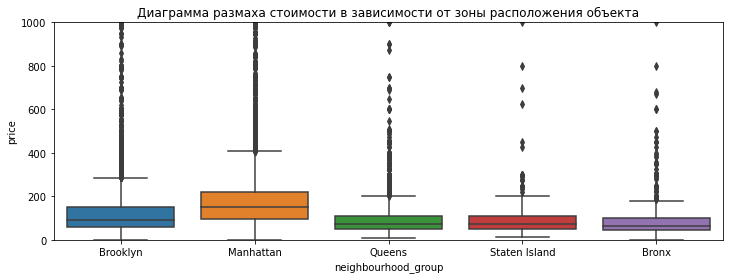

In [23]:
# Посмотрим диаграммы размаха по целевому признаку в зависимости от расположения (ограничим верхнуюю границу цены)
plt.figure(figsize = (12,4))
ax = sns.boxplot(x='neighbourhood_group', y="price", data=df)
plt.title('Диаграмма размаха стоимости в зависимости от зоны расположения объекта')
ax.set_ylim([0, 1000])
plt.show()

* Диаграмма размаха (выше) уже имеет ограничение при построении - данные взяты только до 1000/сутки.
* Как видим, целевой признак очень сильно колеблется, диапазон значений огромный  - минимальное значение = 0, максимальное - 10000/сутки
* Огромное количество выбросов, но в данном случае считаю, что выбраосы нужно сохранять, т.к. они представляют собой дорогие, эксклюзивные объекты.
* Медианное значение цены  - 106/сутки, среднее - 153.
* При выборе моделей будем учитывать этот факт, и выбирать модели устойчивые к выбросам в данных.
* С другой стороны, рынок элитного жилья наверное должен анализироваться отдельно
* Также предлагаю удалить нулевые объекты (их всего 11), т.к. скорее всего данные ошибочные

In [24]:
#df.query("price > 8000")
df = df[df.price != 0]
df

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0      2787      Brooklyn            Kensington          40.64749 -73.97237    
1      2845      Manhattan           Midtown             40.75362 -73.98377    
2      4632      Manhattan           Harlem              40.80902 -73.94190    
3      4869      Brooklyn            Clinton Hill        40.68514 -73.95976    
4      7192      Manhattan           East Harlem         40.79851 -73.94399    
...     ...            ...                   ...              ...       ...    
48890  8232441   Brooklyn            Bedford-Stuyvesant  40.67853 -73.94995    
48891  6570630   Brooklyn            Bushwick            40.70184 -73.93317    
48892  23492952  Manhattan           Harlem              40.81475 -73.94867    
48893  30985759  Manhattan           Hell's Kitchen      40.75751 -73.99112    
48894  68119814  Manhattan           Hell's Kitchen      40.76404 -73.98933    

             room_type  price  minimum_nights  number_of_reviews  \
0      Private room     149    1               9                   
1      Entire home/apt  225    1               45                  
2      Private room     150    3               0                   
3      Entire home/apt  89     1               270                 
4      Entire home/apt  80     10              9                   
...                ...  ..     ..             ..                   
48890  Private room     70     2               0                   
48891  Private room     40     4               0                   
48892  Entire home/apt  115    10              0                   
48893  Shared room      55     1               0                   
48894  Private room     90     7               0                   

       reviews_per_month  calculated_host_listings_count  availability_365  
0      0.21               6                               365               
1      0.38               2                               355               
2     NaN                 1                               365               
3      4.64               1                               194               
4      0.10               1                               0                 
...     ...              ..                              ..                 
48890 NaN                 2                               9                 
48891 NaN                 2                               36                
48892 NaN                 1                               27                
48893 NaN                 6                               2                 
48894 NaN                 1                               23                

[48884 rows x 12 columns]

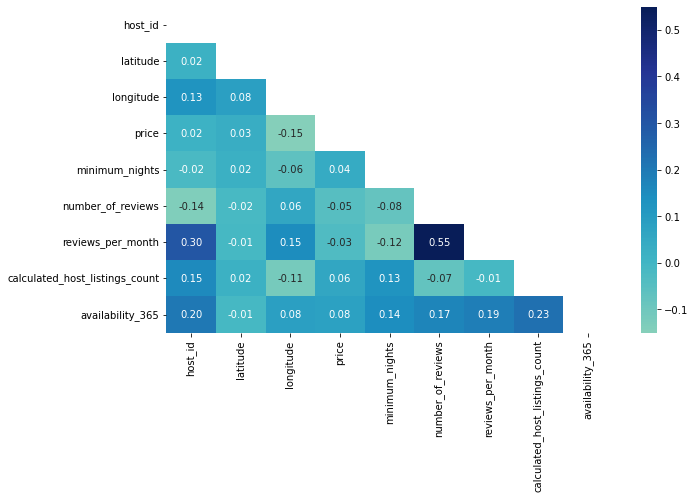

In [25]:
# Прсмотрим общую матрицу корреляции (по всем признакам)
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
sns.heatmap(lower, annot=True,fmt='.2f', cbar=True, center =0, cmap="YlGnBu", linecolor='white');
#vmin=-0.5, vmax=0.7

In [26]:
# Посмотрим на самую большую корреляцию (положительную и отрицательную)
print(df.corr()['price'].sort_values(ascending=False).head(15))
print('-----------------------------------------------')
print(df.corr()['price'].sort_values(ascending=False).tail())

price                             1.000000
availability_365                  0.081847
calculated_host_listings_count    0.057462
minimum_nights                    0.042805
latitude                          0.033899
host_id                           0.015294
reviews_per_month                -0.030575
number_of_reviews                -0.047926
longitude                        -0.149954
Name: price, dtype: float64
-----------------------------------------------
latitude             0.033899
host_id              0.015294
reviews_per_month   -0.030575
number_of_reviews   -0.047926
longitude           -0.149954
Name: price, dtype: float64


In [27]:
# reviews_per_month проставим пропущенные значения (21%) медианным значением
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

<Figure size 720x720 with 0 Axes>

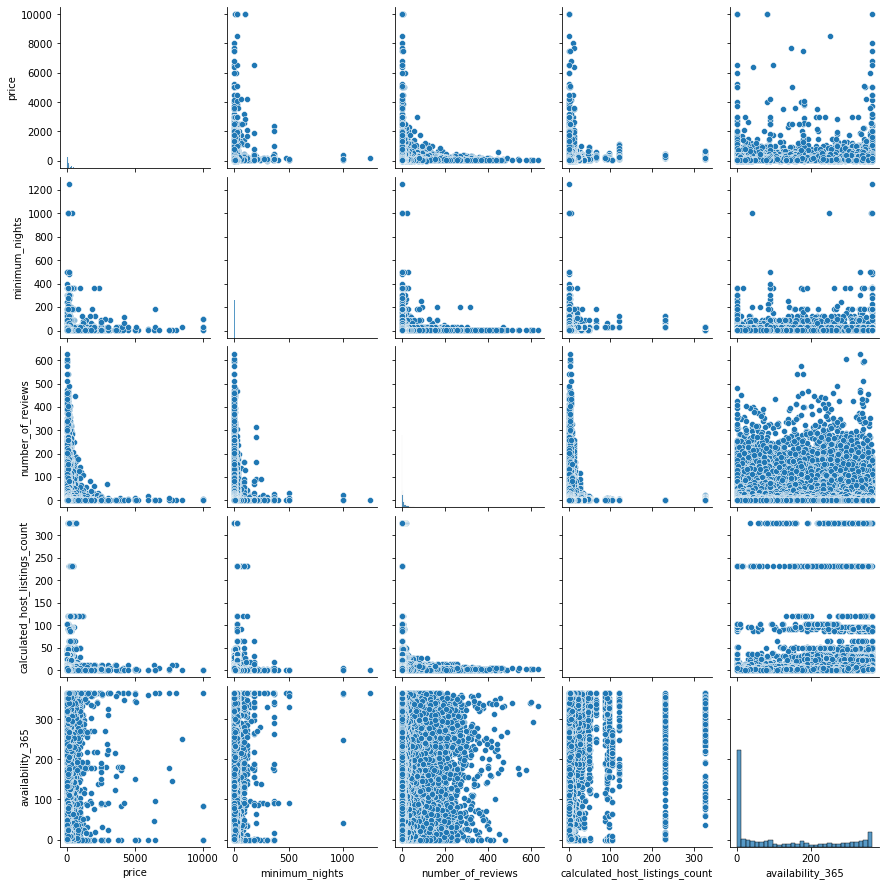

In [28]:
# построим график попарной корреляции признаков
plt.figure(figsize=(10,10))
sns.pairplot(data=df, vars=('price', 'minimum_nights', 'number_of_reviews',\
                            'calculated_host_listings_count', 'availability_365'),
             height=2.5);

#### Данные по расположению (координаты)
* Анализ координат был сделан отдельно с помощью BI инструмента QlikSense
* Широта и долгота были объединены в одну колонку и построена была карта города
* Эту информацию я прилагаю в конце этого блока стационарно в виде скрина карты города с отметками объектов
* Для других целей эти данные не вижу смысла использовать.
* Для нашего набора данных считаю, что координаты смело можно удалить, т.к. они сильно коррелируют с данными в столбце района (возможно, при моделировании я поменяю свое мнение, и верну координаты/создам новый признак, например рассотяние от объекта до центра)



In [29]:
# Загрузим QlikSense результаты гео анализа с внешнего диска
from IPython.display import Image
from IPython.core.display import HTML
#Image(url="https://disk.yandex.ru/i/C42f2PAfgzgF1g.png", width=300, height=300)
#Image(url="https://disk.yandex.com/i/U3xzeZ9Rz6gIPg.png", width=300, height=300)
#Image(url="https://disk.yandex.com/i/wjjjrRhlSpC1Ng.png", width=300, height=300)
#Image(url="https://disk.yandex.com/i/UHBpHGhjw0ynnw.png", width=300, height=300);

* Репрезентация включает два слоя - плотность (density) и непосредственно объекты (points)
* По каждой выборке построена диаграмма размаха, а также выведены основные данные боксплота
* Цветовое кодирование по цене

##### QlikSense результаты гео анализа 1
* Все районы
* Тип жилья - только полностью дом/квартира.

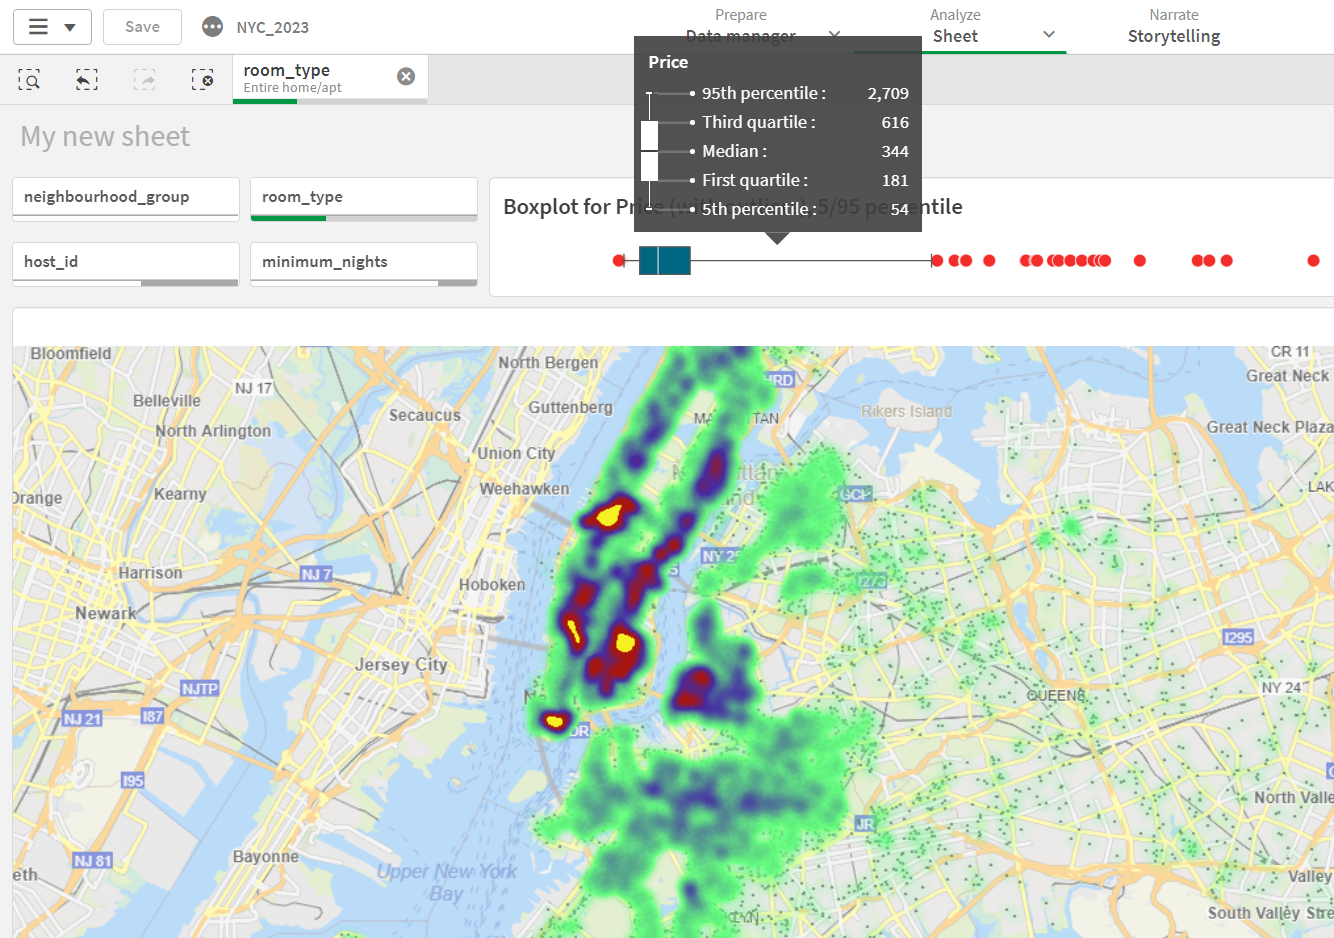

In [31]:
Image(filename="images/1.png")

##### QlikSense результаты гео анализа 2
* Все районы
* Тип жилья - только комнаты (отдельные и shared).
* Цветовое кодирование по цене.

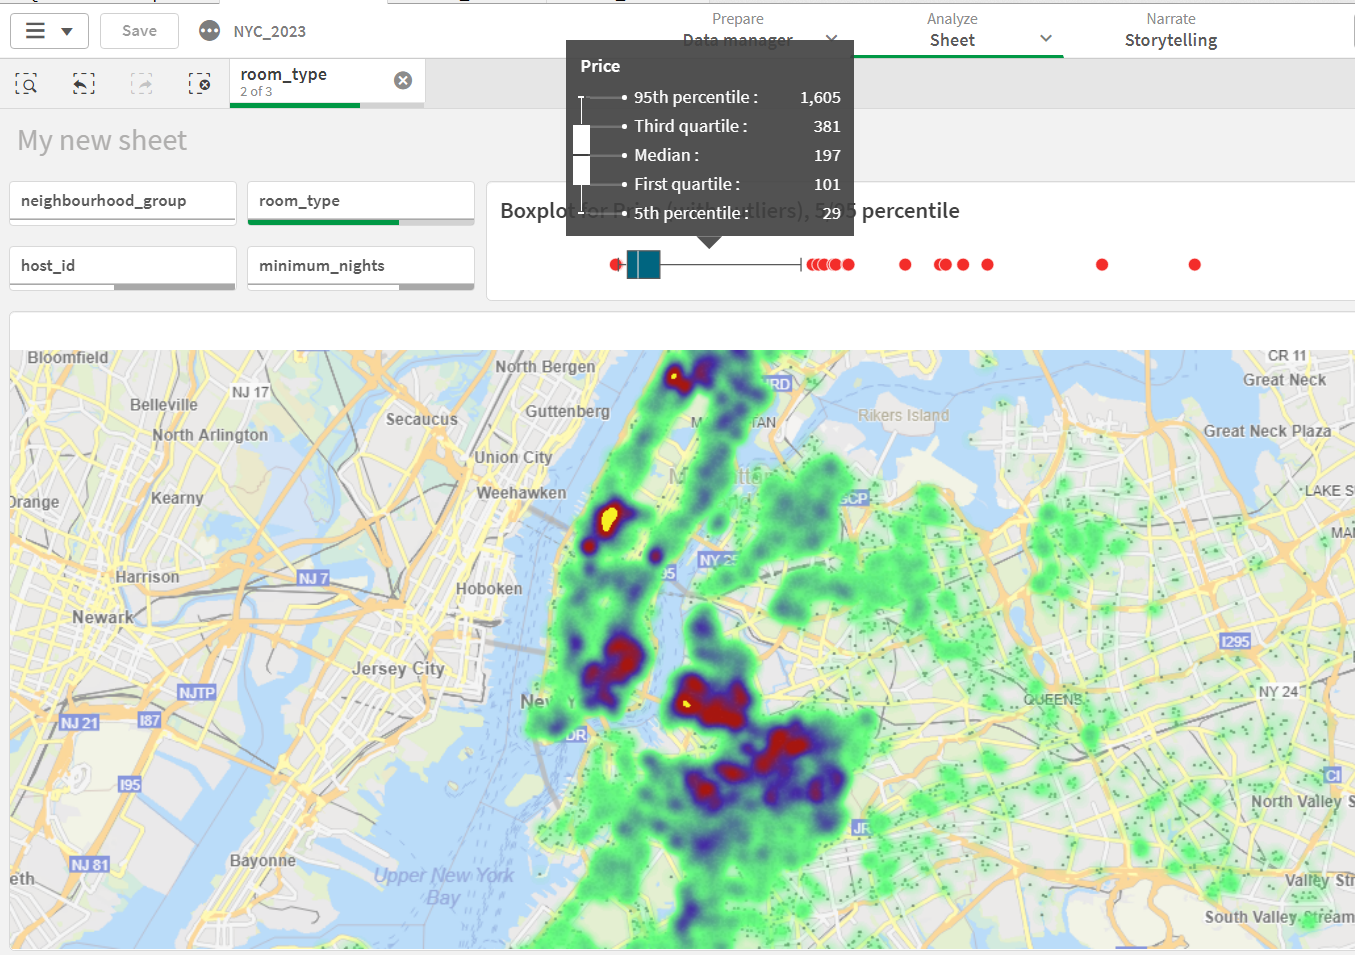

In [32]:
Image(filename="images/2.png")

##### QlikSense результаты гео анализа 3
* Только район Манхеттен
* Тип жилья - только полностью дом/квартира
* Цветовое кодирование по цене.


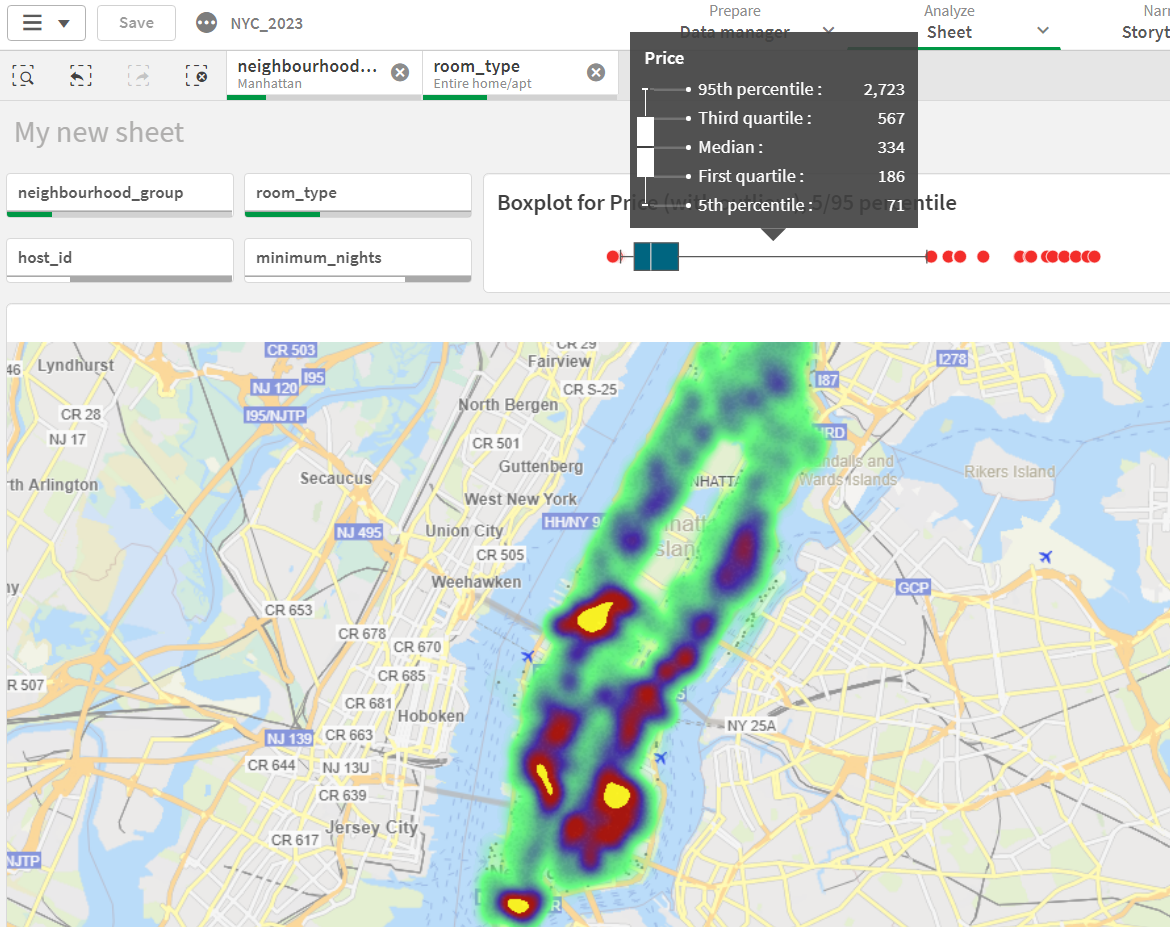

In [33]:
Image(filename="images/3.png")

##### QlikSense результаты гео анализа 4
* Все районы, кроме Манхеттена
* Тип жилья - все, кроме полностью дом/квартира (т.е. комнаты)
* Цветовое кодирование по цене

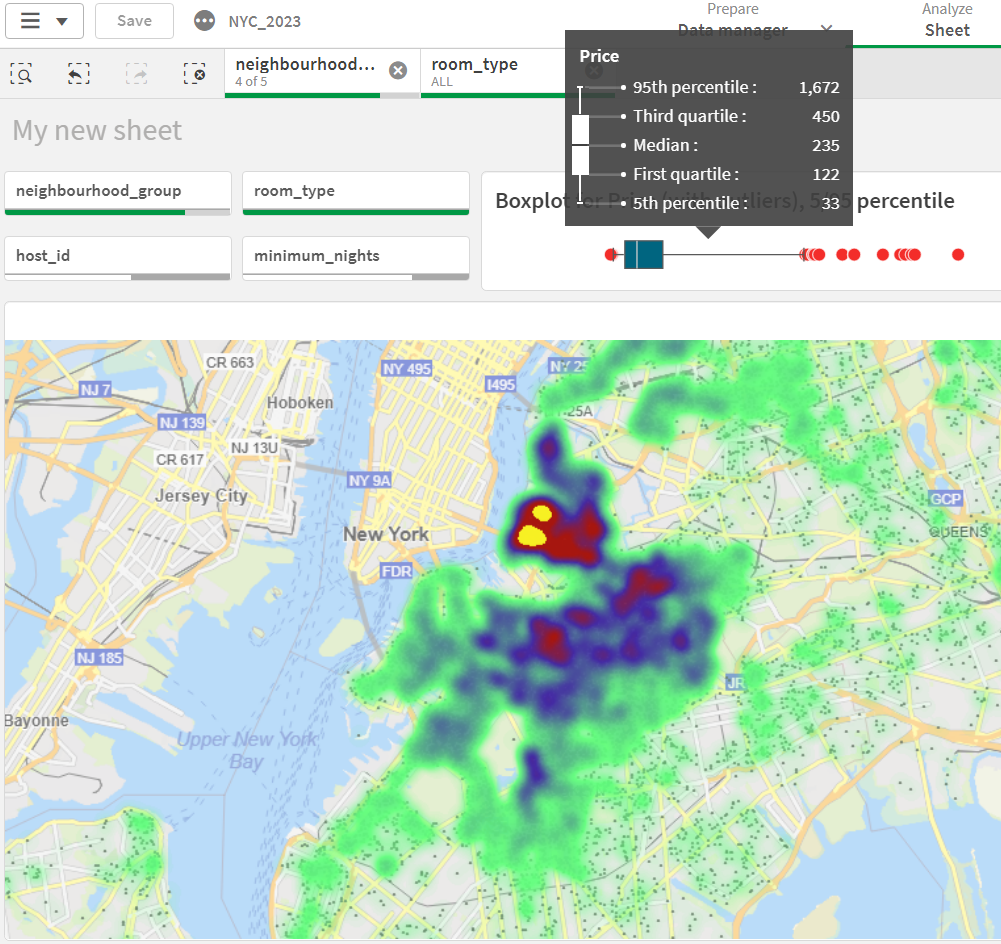

In [34]:
Image(filename="images/4.png")

* Судя по этим данным, я бы делала два разных датасета и различный анализ в двух измерениях:
    - комнаты отдельно, квартиры отдельно
    - Манхеттен отдельно от всего остального

In [35]:
# пока уберем коориднаты, т.к. расположение известно по району
df = df.drop(['host_id', 'latitude', 'longitude'], axis=1)

In [36]:
df

neighbourhood_group       neighbourhood        room_type  price  \
0      Brooklyn            Kensington          Private room     149     
1      Manhattan           Midtown             Entire home/apt  225     
2      Manhattan           Harlem              Private room     150     
3      Brooklyn            Clinton Hill        Entire home/apt  89      
4      Manhattan           East Harlem         Entire home/apt  80      
...          ...                   ...                     ...  ..      
48890  Brooklyn            Bedford-Stuyvesant  Private room     70      
48891  Brooklyn            Bushwick            Private room     40      
48892  Manhattan           Harlem              Entire home/apt  115     
48893  Manhattan           Hell's Kitchen      Shared room      55      
48894  Manhattan           Hell's Kitchen      Private room     90      

       minimum_nights  number_of_reviews  reviews_per_month  \
0      1               9                  0.21                
1      1               45                 0.38                
2      3               0                  0.72                
3      1               270                4.64                
4      10              9                  0.10                
...    ..             ..                   ...                
48890  2               0                  0.72                
48891  4               0                  0.72                
48892  10              0                  0.72                
48893  1               0                  0.72                
48894  7               0                  0.72                

       calculated_host_listings_count  availability_365  
0      6                               365               
1      2                               355               
2      1                               365               
3      1                               194               
4      1                               0                 
...   ..                              ..                 
48890  2                               9                 
48891  2                               36                
48892  1                               27                
48893  6                               2                 
48894  1                               23                

[48884 rows x 9 columns]

Для отражения общего распределения данных построим графики двух сортов:
* для непрерывных величин построим гистограммы распределения
* для непрерывных величин также построим boxplot
* для дискретных и банарных - countplot
* применим разбивку по районам и отдельно по типам объектов

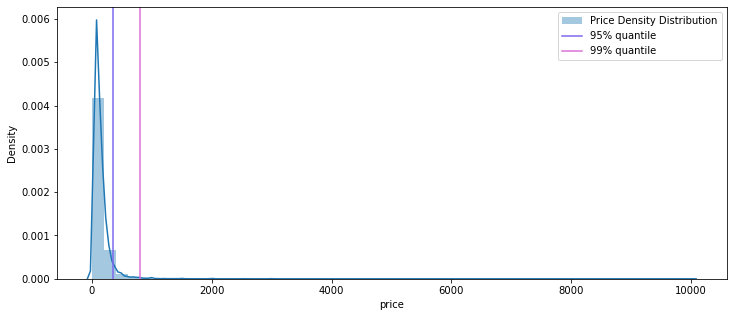

In [37]:
# очень неровные данные, большое количество выбросов
plt.subplots(figsize=(12,5))
sns.distplot(df['price'], label='Price Density Distribution')
plt.axvline(df.price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.price.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

* Судя по всему, придется работать с выбросами.
* Точнее, так: датасет нужно разделять на обычные цены и на элитное жилье, и анализировать/моделировать отдельно.
* Предлагаю, пока оставить как есть, если модели не смогут предсказывать, учитывая огромное колчиество аномалий, то вернемся к их обработке.
* Еще посмотрим в разбивке по районам - везде ли такие аномалии присутствуют или только в каком-то определенном районе

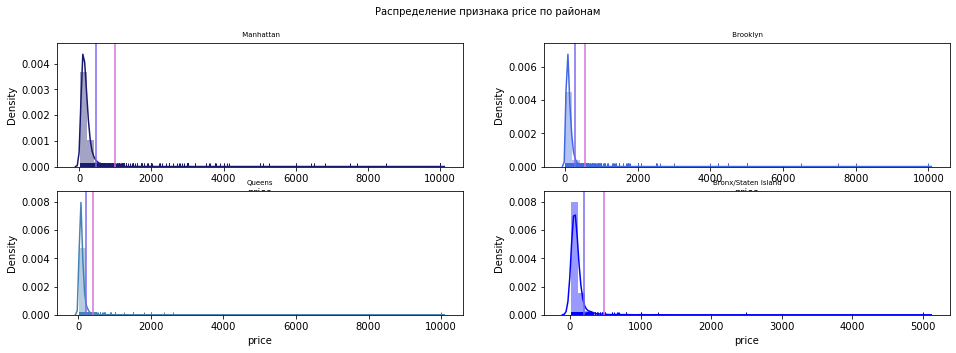

In [38]:
# Построим графики распределения целевого признака по всем регионам
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.suptitle('Распределение признака price по районам \n', fontsize=10)
plt.title(' \n Manhattan', fontsize=7)
#plt.xlabel('product')
#plt.ylabel('')
sns.distplot(df.query('neighbourhood_group == "Manhattan"')['price'], bins=50, rug=True, color= 'midnightblue')
plt.axvline(df.query('neighbourhood_group == "Manhattan"').price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.query('neighbourhood_group == "Manhattan"').price.quantile(0.99), label='99% quantile', c='orchid')

plt.subplot(2,2,2)
plt.title(' \n Brooklyn', fontsize=7)
#plt.xlabel('product')
#plt.ylabel('')
sns.distplot(df.query('neighbourhood_group == "Brooklyn"')['price'], bins=50,rug=True, color= 'royalblue')
plt.axvline(df.query('neighbourhood_group == "Brooklyn"').price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.query('neighbourhood_group == "Brooklyn"').price.quantile(0.99), label='99% quantile', c='orchid')

plt.subplot(2,2,3)
plt.title('Queens', fontsize=7)
#plt.xlabel(' \n product' + '\n район 1')
#plt.ylabel('')
sns.distplot(df.query('neighbourhood_group == "Queens"')['price'], bins=50,rug=True, color= 'steelblue')
plt.axvline(df.query('neighbourhood_group == "Queens"').price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.query('neighbourhood_group == "Queens"').price.quantile(0.99), label='99% quantile', c='orchid')

plt.subplot(2,2,4)
plt.title('Bronx/Staten Island', fontsize=7)
#plt.xlabel(' \n product' + '\n район 1')
#plt.ylabel('')
sns.distplot(df.query('neighbourhood_group == "Bronx" or neighbourhood_group == "Staten Island"')['price'], bins=50,rug=True, color= 'blue')
plt.axvline(df.query('neighbourhood_group == "Bronx" or neighbourhood_group == "Staten Island"').price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.query('neighbourhood_group == "Bronx" or neighbourhood_group == "Staten Island"').price.quantile(0.99), label='99% quantile', c='orchid')
plt.show()

* Выбросы практически равнозначно присутствуют во всех районах и аномалии доходят до 10000/сутки, за исключением районов Bronx/Staten Island, там максимальные значения доходят всего лишь до 5000.
* Принципиально картины это не меняет, и все выводы, сделанные пунктом выше, валидны
* Продолжим анализ по отдельным значениям
* Но сначала проведем анализ выбросов/аномалий

In [39]:
def outlier_std(df, col, threshold=3):
    mean = df[col].mean()
    std = df[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([df[col]>up_bound, df[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [40]:
def get_column_outliers(df, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = df.columns

    outliers = pd.Series(data=[False]*len(df), index=df_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(df, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True

    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)

    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))

In [41]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [42]:
df_features = df.iloc[:, 3:]

In [43]:
# Посмотрим как много у нас аномалий
comparison_table, std_outliers = get_column_outliers(df_features)
anomalies_report(std_outliers)

Total number of outliers: 3291
Percentage of outliers:   6.73%


In [44]:
# Посмотрим на сводный результат по выбросам/аномальным значениям
comparison_table

upper_bound  lower_bound  anomalies_count  \
number_of_reviews               156.925983  -110.382001   1221.0            
reviews_per_month               5.801202    -3.323525     898.0             
calculated_host_listings_count  106.013183  -91.723927    680.0             
price                           873.265833  -567.755728   388.0             
minimum_nights                  68.566559   -54.506785    327.0             
availability_365                507.661312  -282.102315   0.0               

                                anomalies_percentage  
number_of_reviews               2.497750              
reviews_per_month               1.837002              
calculated_host_listings_count  1.391048              
price                           0.793716              
minimum_nights                  0.668931              
availability_365                0.000000

In [45]:
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.3)|(lower[column] < -0.3))
]
high_corr

['number_of_reviews']

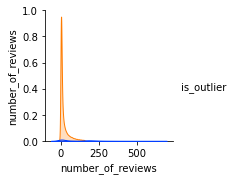

In [46]:
labeled_data = df_features[high_corr].copy()
labeled_data['is_outlier'] = std_outliers

sns.pairplot(data=labeled_data, vars = high_corr,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');
# Возможно, этот признак можно было бы удалить вообще

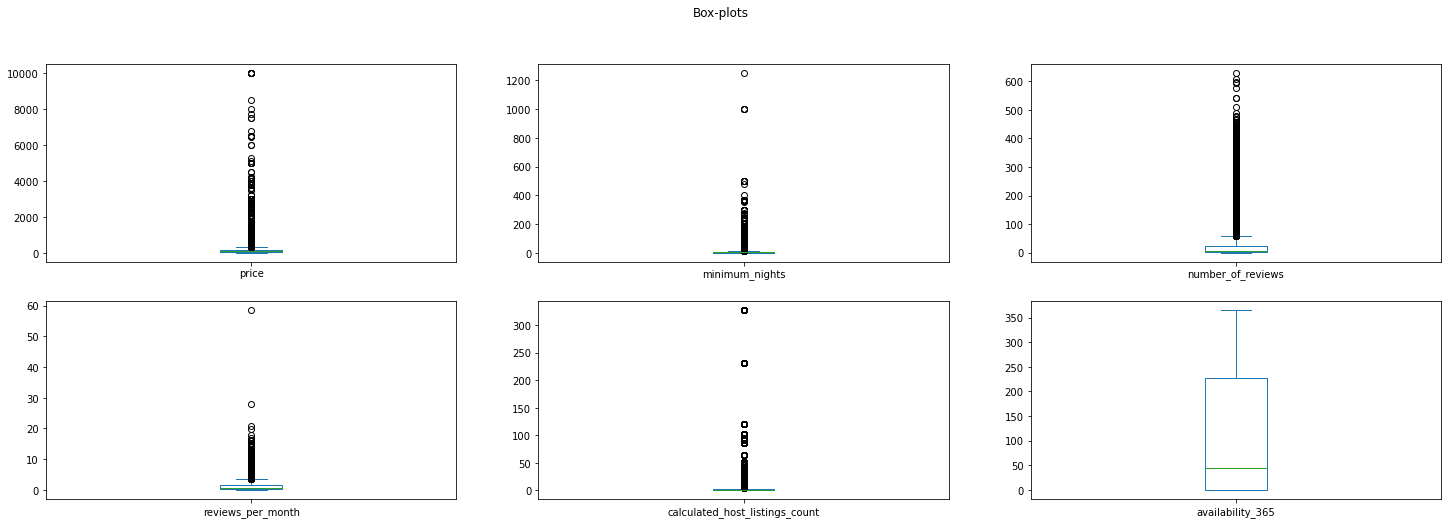

In [47]:
# Посмотрим на все признаки еще раз. Да, очень аномально )
fig, axes = plt.subplots(2, 3, figsize=(25, 8))
fig.suptitle('Box-plots')

row=0
col=0

for ax, feature in enumerate(df_features):
    df_features[feature].plot.box(ax=axes[row, col])
    col+=1
    if col > 2:
        row+=1
        col=0

In [48]:
# Посмотрим на выбросы/аномальные значения, выходязие за 1.5 интерквантильных размаха (0,25/0,75 квантиль)
def outlier_iqr(df, col, threshold=1.5):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    up_bound = df[col].quantile(0.75) + (IQR * threshold)
    low_bound = df[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([df[col]>up_bound, df[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [49]:
comparison_table, iqr_outliers = get_column_outliers(df_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 12536
Percentage of outliers:   25.64%


In [50]:
comparison_table

upper_bound  lower_bound  anomalies_count  \
minimum_nights                  17.00       -11.00        5587.0            
calculated_host_listings_count  5.00        -2.00         4791.0            
number_of_reviews               93.00       -68.00        3322.0            
price                           493.00      -249.00       1328.0            
reviews_per_month               5.48        -3.62         1085.0            
availability_365                908.00      -681.00       0.0               

                                anomalies_percentage  
minimum_nights                  11.429097             
calculated_host_listings_count  9.800753              
number_of_reviews               6.795680              
price                           2.716635              
reviews_per_month               2.219540              
availability_365                0.000000

* Мы провели анализ аномалий в данных
* Аномалий конечно много, еще раз вывод, что анализ столь различных сегментов рынка (среднего и элитного)  вместе затруднен

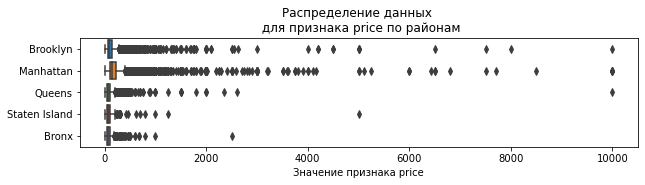

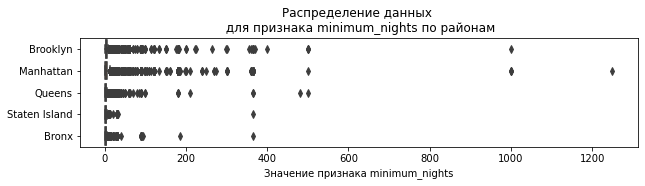

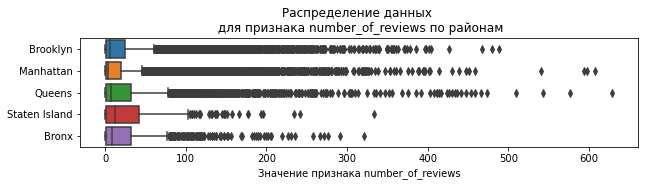

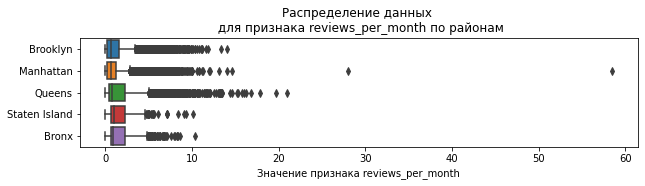

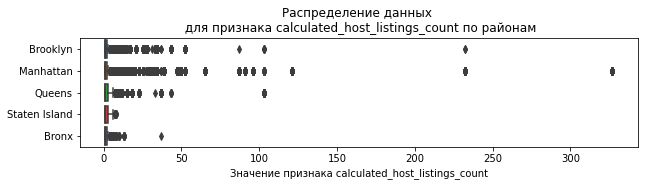

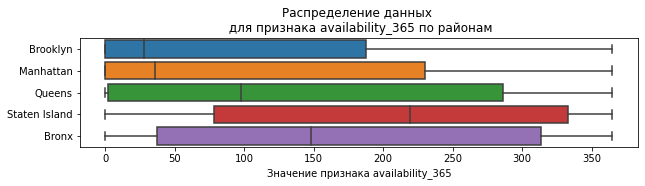

In [51]:
# для непрерывных величин построим boxplot (по районам)
for column in df.drop(columns = ['neighbourhood_group', 'neighbourhood','room_type']).columns:
    fig,ax = plt.subplots(figsize=(10,2))
    ax=sns.boxplot(df[column], df.neighbourhood_group, ax=ax,  orient='h', saturation=0.8)
    plt.title('Распределение данных \n для признака '+ str(column) + ' по районам')
    plt.xlabel('Значение признака ' + column)
    plt.ylabel('')
    plt.show()

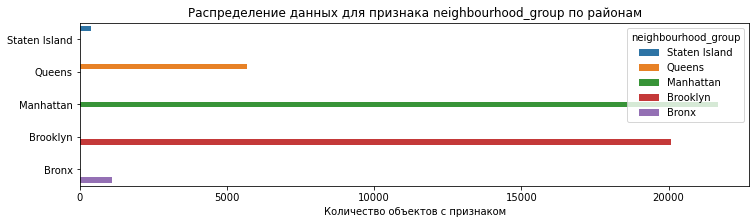

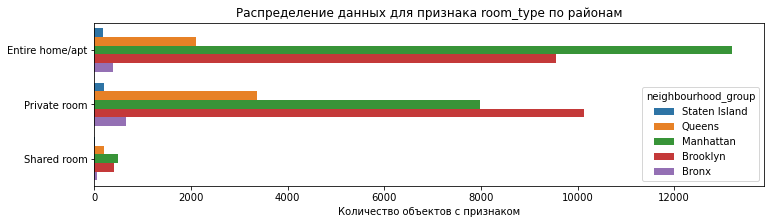

In [52]:
# для дискретных и бинарных величин используем countplot (по районам)
for column in df.drop(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                        'calculated_host_listings_count', 'availability_365', 'neighbourhood'],axis=1).columns:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.countplot(y=column, hue='neighbourhood_group', data=df.sort_values(by='neighbourhood_group', ascending=False), ax=ax, saturation=0.8)
    plt.title('Распределение данных для признака '+ str(column) + ' по районам')
    plt.xlabel('Количество объектов с признаком')
    plt.ylabel('')
    plt.show()

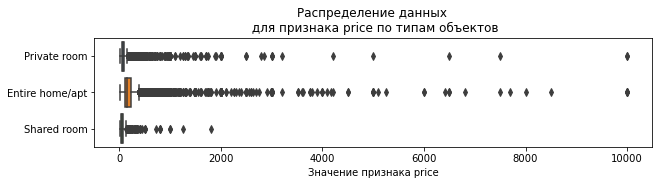

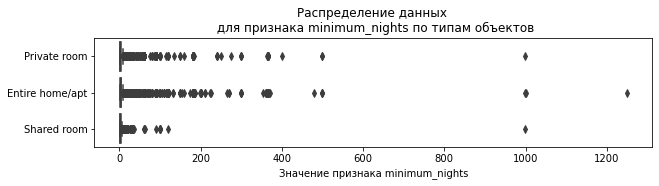

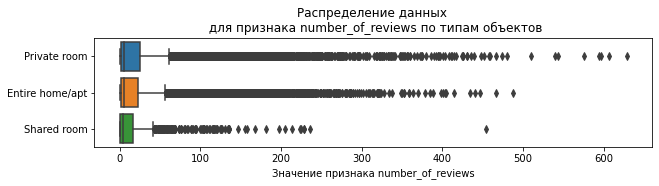

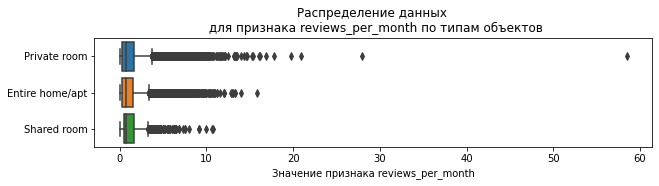

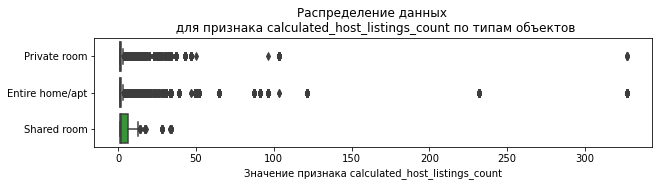

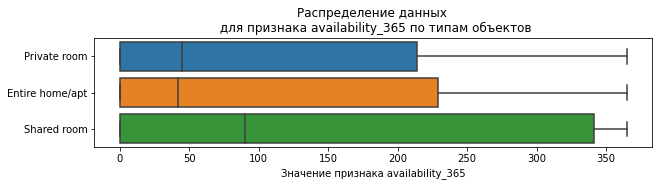

In [53]:
#для непрерывных величин построим boxplot (по типам объектов)
for column in df.drop(columns = ['neighbourhood_group', 'neighbourhood', 'room_type']).columns:
    fig,ax = plt.subplots(figsize=(10,2))
    ax=sns.boxplot(df[column], df.room_type, ax=ax,  orient='h', saturation=0.8)
    plt.title('Распределение данных \n для признака '+ str(column) + ' по типам объектов')
    plt.xlabel('Значение признака ' + column)
    plt.ylabel('')
    plt.show()

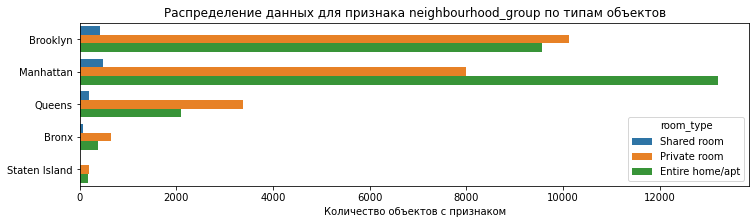

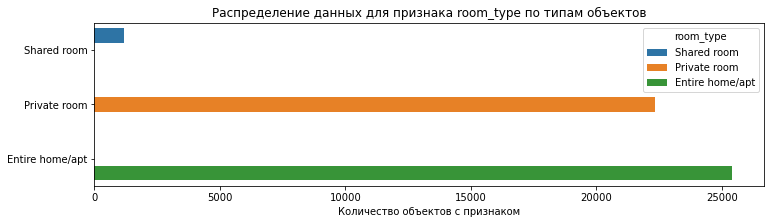

In [54]:
# для дискретных и банарных величин используем countplot (по типам объектов)
for column in df.drop(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                        'calculated_host_listings_count', 'availability_365', 'neighbourhood'],axis=1).columns:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.countplot(y=column, hue='room_type', data=df.sort_values(by='room_type', ascending=False), ax=ax, saturation=0.8, orient ='h')
    plt.title('Распределение данных для признака '+ str(column) + ' по типам объектов')
    plt.xlabel('Количество объектов с признаком')
    plt.ylabel('')
    plt.show()

#### НАБЛЮДЕНИЯ:
- Ту же картину мы наблюдали при построении гистограмм распределения и диаграмм размаха.
- Итак, пока оставляем как есть. Если модели не смогут предсказывать, учитывая огромное колчиество аномалий, то вернемся к их обработке (удалению или возможно к разбивке на два датасета).

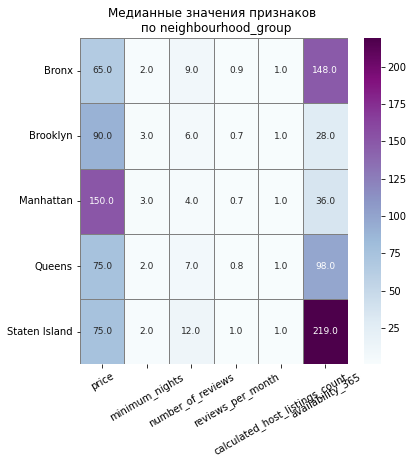

In [55]:
# Посмотрим в разбивке по y (price) в виде медианных значений по признаку района
plt.figure(figsize = (6,6))
sns.heatmap(data=df.groupby(['neighbourhood_group'])['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                        'calculated_host_listings_count', 'availability_365'].median().round(1), annot = True,
        linewidths=1, linecolor='grey',cmap="BuPu", fmt='.1f', annot_kws={"size": 9})
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.title('Медианные значения признаков \n по neighbourhood_group')
plt.ylabel('')
plt.xlabel('')
plt.show()

* Эта матрица как-раз показала/подтвердила, что элитное жилье (Манхеттен) выделяется на фоне остальных районов - оно сдается более краткосрочно и за гораздо более высокую цену

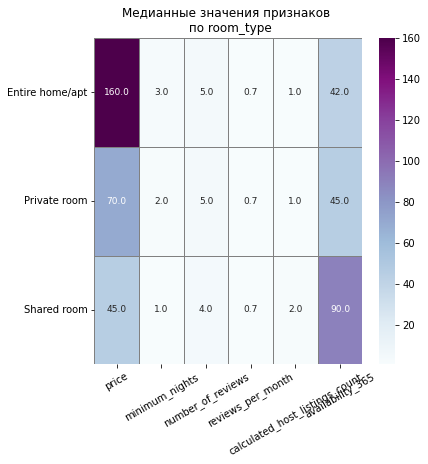

In [56]:
# Посмотрим в разбивке по y (price) в виде медианных значений по типу жилья
plt.figure(figsize = (6,6))
sns.heatmap(data=df.groupby(['room_type'])['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                        'calculated_host_listings_count', 'availability_365'].median().round(1), annot = True,
        linewidths=1, linecolor='grey',cmap="BuPu", fmt='.1f', annot_kws={"size": 9})
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.title('Медианные значения признаков \n по room_type')
plt.ylabel('')
plt.xlabel('')
plt.show()

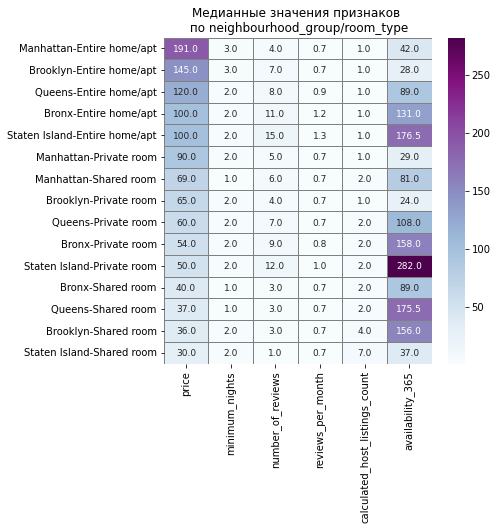

In [57]:
# Посмотрим в разбивке по y (price) в виде медианных значений по району и типу жилья
plt.figure(figsize = (6,6))
sns.heatmap(data=df.groupby(['neighbourhood_group','room_type'])['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                        'calculated_host_listings_count', 'availability_365'].median().round(1).sort_values(by= 'price', ascending = False), annot = True,
        linewidths=1, linecolor='grey',cmap="BuPu", fmt='.1f', annot_kws={"size": 9})
#plt.xticks(rotation=10)
plt.yticks(rotation=0)
plt.title('Медианные значения признаков \n по neighbourhood_group/room_type')
plt.ylabel('')
plt.xlabel('')
plt.show()

* Все выше сделанные выводы подтверждаются
* Однозначно, анализ комнат (регрессионные модели) нужно делать отдельно!

<a id="model1"></a>
## 2. Построение и тренировка моделей

In [58]:
from category_encoders import OrdinalEncoder, OneHotEncoder
#enc = OneHotEncoder()
#enc.fit_transform(df[['neighbourhood_group','neighbourhood','room_type']]).head()
#df_enc = df.drop(['neighbourhood_group','neighbourhood','room_type'], axis = 1).\
    #join(enc.fit_transform(df[['neighbourhood_group','neighbourhood','room_type']], axis = 0))
#df_enc.head()

In [59]:
# Зададим функцию, которая кодирует категориальные признаки выбранным методом.
def encode_func(df, enc, cols = ['neighbourhood_group','neighbourhood','room_type']):
  df_enc = df.copy()
  df_enc[cols]= enc.fit_transform(df_enc[cols])
  return df_enc

In [60]:
# После проб и ошибок, я остановилась именно на этом енкодере, т.к. он больше подходит к данной ситуации
from category_encoders import CountEncoder
enc = CountEncoder()
df_enc = encode_func(df, enc)
df_enc.head()

neighbourhood_group  neighbourhood  room_type  price  minimum_nights  \
0  20095                175            22319      149    1                
1  21660                1545           25407      225    1                
2  21660                2658           22319      150    3                
3  20095                572            25407      89     1                
4  21660                1117           25407      80     10               

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0  9                  0.21               6                                
1  45                 0.38               2                                
2  0                  0.72               1                                
3  270                4.64               1                                
4  9                  0.10               1                                

   availability_365  
0  365               
1  355               
2  365               
3  194               
4  0

Text(0.5, 1.0, 'Price Density Distribution')

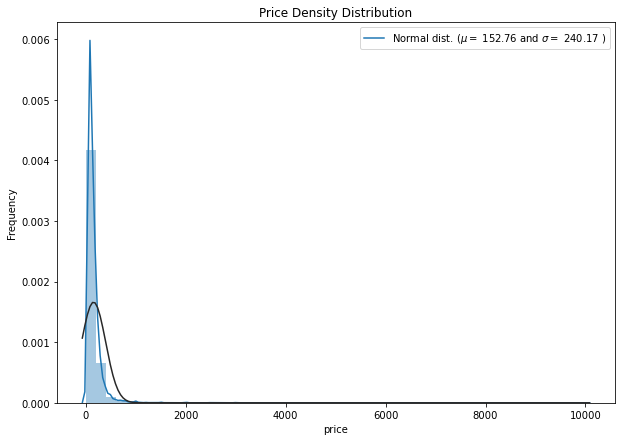

In [61]:
# проверим нормальное ли распределение у целевого признака
plt.figure(figsize=(10,7))
sns.distplot(df_enc.price, fit=norm)
(mu, sigma) = norm.fit(df_enc.price)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Price Density Distribution')

* Как видим на графике выше, наше распределение не совсем нормальное, т.е. оно сильно скошено и имеет большую плотность справа * Cделаем монотонное преобразование целевой переменной через логарифмирование 
* Спойлер - это не помогло..

Text(0.5, 1.0, 'Log of Price Density Distribution')

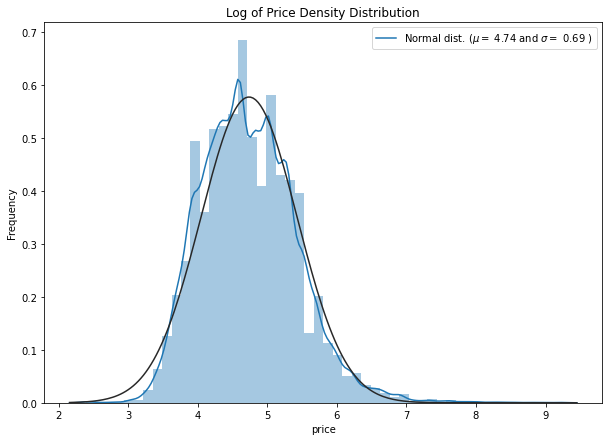

In [62]:
# берем логарифм от цены
df_enc['price'] = np.log1p(df.price)

plt.figure(figsize=(10,7))
sns.distplot(df_enc.price, fit=norm)

# фитим распределение на логарифм от цены
(mu, sigma) = norm.fit(df_enc.price)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log of Price Density Distribution')

In [63]:
df_enc.head()

neighbourhood_group  neighbourhood  room_type     price  minimum_nights  \
0  20095                175            22319      5.010635  1                
1  21660                1545           25407      5.420535  1                
2  21660                2658           22319      5.017280  3                
3  20095                572            25407      4.499810  1                
4  21660                1117           25407      4.394449  10               

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0  9                  0.21               6                                
1  45                 0.38               2                                
2  0                  0.72               1                                
3  270                4.64               1                                
4  9                  0.10               1                                

   availability_365  
0  365               
1  355               
2  365               
3  194               
4  0

In [64]:
df_enc.price.median()

4.672828834461906

In [65]:
X = df_enc.drop('price', axis=1)
y = df_enc['price']

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True)

In [67]:
print("X_train shape is",X_train.shape)
print("y_train shape is",y_train.shape)

print("X_test shape is ",X_test.shape)
print("y_test shape is",y_test.shape)

X_train shape is (34218, 8)
y_train shape is (34218,)
X_test shape is  (14666, 8)
y_test shape is (14666,)


In [68]:
#df_enc.columns

In [69]:
#numeric = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price'], axis=1).columns
#numeric

In [70]:
# Проведем стандартизацию, т.к. в данном случае все характеристики в разном масштабе/шкале (какие-то в десятых долях, какие-то в стонях единиц или даже в тысячах).
# Для избежания того, что модель будет придавать бОльшим значениям бОльшую значимость/веса, мы проведем стандартизацию и приведем все к одной шкале.
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[1.00000000e+00, 6.43185299e-02, 8.72654542e-01, ...,
        4.32552573e-02, 0.00000000e+00, 1.09589041e-01],
       [1.00000000e+00, 4.99489535e-01, 8.72654542e-01, ...,
        1.19678578e-02, 0.00000000e+00, 2.13698630e-01],
       [1.00000000e+00, 4.58652374e-01, 1.00000000e+00, ...,
        2.73551034e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.36825292e-02, 2.80755487e-03, 0.00000000e+00, ...,
        2.13711746e-02, 3.06748466e-03, 6.60273973e-01],
       [1.00000000e+00, 5.02807555e-01, 1.00000000e+00, ...,
        2.05163276e-03, 0.00000000e+00, 5.47945205e-03],
       [2.48649410e-01, 1.36804492e-01, 1.00000000e+00, ...,
        3.41938793e-04, 0.00000000e+00, 0.00000000e+00]])

In [71]:
X_test

array([[1.        , 0.28381827, 0.87265454, ..., 0.01333561, 0.00920245,
        0.07945205],
       [1.        , 0.2848392 , 0.87265454, ..., 0.06890067, 0.00920245,
        0.64931507],
       [0.92648095, 1.        , 1.        , ..., 0.00530005, 0.02147239,
        0.26575342],
       ...,
       [0.92648095, 0.6281266 , 1.        , ..., 0.06924261, 0.        ,
        0.62191781],
       [1.        , 0.49948954, 0.        , ..., 0.04547786, 0.01226994,
        0.13150685],
       [0.92648095, 0.01990812, 0.87265454, ..., 0.00153872, 0.        ,
        0.        ]])

### Модели регрессии - подбор параметров и оценка качества

In [72]:
MSE_neg = make_scorer(mean_squared_error, greater_is_better=False)
MAE = make_scorer(mean_absolute_error)
R2 = make_scorer(r2_score)
#RMSE = make_scorer(mean_squared_error)

#### Построение и тренировка модели DummyRegressor

In [73]:
# В самом начале посмотрим на прогноз модели построенной с помощью DummyRegressor
from sklearn.dummy import DummyRegressor
model_dr = DummyRegressor()
#strategy='median'
model_dr.fit(X_train, y_train)
y_train_pred_dr = model_dr.predict(X_train)
predictions_test_dr = model_dr.predict(X_test)
rmse_dr_test = np.sqrt(mean_squared_error(y_test, predictions_test_dr))
print("Test MSE DummyRegressor = %.2f" % mean_squared_error(y_test, predictions_test_dr))
print("Train MSE DummyRegressor = %.2f" % mean_squared_error(y_train, y_train_pred_dr))
print('Test RMSE модели DummyRegressor: {:.2f}'.format(rmse_dr_test))
print('Test R2 модели DummyRegressor: {:.2f}'.format(r2_score(y_test,predictions_test_dr)))

Test MSE DummyRegressor = 0.47
Train MSE DummyRegressor = 0.48
Test RMSE модели DummyRegressor: 0.69
Test R2 модели DummyRegressor: -0.00


In [74]:
# Создадим новый маленький датафрейм с итоговыми результатами
columns = ['MSE', 'RMSE', 'R2']
models = ['DummyRegressor', 'CatBoostRegressor', 'LinearRegression', 'RidgeRegression',
          'LassoRegression', 'ElasticNet Regression', 'LGBMRegressor']
result = pd.DataFrame(columns=columns, index = models)
result

MSE RMSE   R2
DummyRegressor         NaN  NaN  NaN
CatBoostRegressor      NaN  NaN  NaN
LinearRegression       NaN  NaN  NaN
RidgeRegression        NaN  NaN  NaN
LassoRegression        NaN  NaN  NaN
ElasticNet Regression  NaN  NaN  NaN
LGBMRegressor          NaN  NaN  NaN

In [75]:
result.loc['DummyRegressor','MSE'] = mean_squared_error(y_test, predictions_test_dr).round(2)
result.loc['DummyRegressor','RMSE'] = rmse_dr_test.round(2)
result.loc['DummyRegressor','R2'] = r2_score(y_test,predictions_test_dr).round(2)

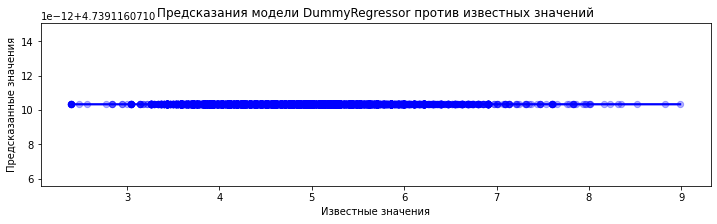

In [76]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(12,3))
sns.regplot(y_test, predictions_test_dr, color= 'b', fit_reg=True, scatter_kws={"s": 40, 'alpha':0.3})
plt.title('Предсказания модели DummyRegressor против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

#### Построение и тренировка модели CatBoostRegressor

In [77]:
# Сделаем подбрп параметров для модели. Я деактивировала эту ячейку, но она рабочая.

#cat_features=['neighbourhood_group', 'neighbourhood', 'room_type']
#model_cb = CatBoostRegressor(#one_hot_max_size=5,
#                             random_seed=42, verbose =100, loss_function= "RMSE"
#                             )
#parameters = {'depth'         : [8,10,15,20],
#              'learning_rate' : [0.01, 0.05, 0.1],
#              'iterations'    : [50,100,150]
#             }
#grid = GridSearchCV(estimator=model_cb, param_grid = parameters, cv = 5,\
#                     n_jobs=-1, verbose=True)
#grid.fit(X_train, y_train)
#print(" Results from Grid Search " )
#print(score)
#print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", grid.best_params_)

In [78]:
%%time
# Построим модель на основе алгоритма CatBoost
model_cb = CatBoostRegressor(verbose=50, random_seed=42, iterations= 200,\
                             learning_rate = 0.1, depth=10, loss_function='RMSE')
model_cb.fit(X_train,y_train, eval_set=(X_test,y_test),\
              use_best_model=True, plot=True)
print(model_cb.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6605817	test: 0.6542044	best: 0.6542044 (0)	total: 313ms	remaining: 1m 2s
50:	learn: 0.4422904	test: 0.4539294	best: 0.4539294 (50)	total: 9.46s	remaining: 27.6s
100:	learn: 0.4275994	test: 0.4454032	best: 0.4454032 (100)	total: 19.8s	remaining: 19.4s
150:	learn: 0.4139754	test: 0.4395940	best: 0.4395940 (150)	total: 29.1s	remaining: 9.44s
199:	learn: 0.4041236	test: 0.4370268	best: 0.4370268 (199)	total: 38.2s	remaining: 0us

bestTest = 0.4370267605
bestIteration = 199

{'learn': {'RMSE': 0.404123640185224}, 'validation': {'RMSE': 0.43702676049981554}}
CPU times: total: 1min 13s
Wall time: 38.9 s


In [79]:
y_train_pred_cb = model_cb.predict(X_train)
predictions_test_cb = model_cb.predict(X_test)
rmse_cb_test = np.sqrt(mean_squared_error(y_test, predictions_test_cb))
print("Test MSE CatBoostRegressor = %.2f" % mean_squared_error(y_test, predictions_test_cb))
print("Train MSE CatBoostRegressor = %.2f" % mean_squared_error(y_train, y_train_pred_cb))
print("Test RMSE модели CatBoostRegressor: {:.2f}".format(rmse_cb_test))
print("Test R2 score: {:.2f}".format(r2_score(y_test,predictions_test_cb)))
result.loc['CatBoostRegressor','MSE'] = mean_squared_error(y_test, predictions_test_cb).round(2)
result.loc['CatBoostRegressor','RMSE'] = rmse_cb_test.round(2)
result.loc['CatBoostRegressor','R2'] = r2_score(y_test,predictions_test_cb).round(2)

Test MSE CatBoostRegressor = 0.19
Train MSE CatBoostRegressor = 0.16
Test RMSE модели CatBoostRegressor: 0.44
Test R2 score: 0.60


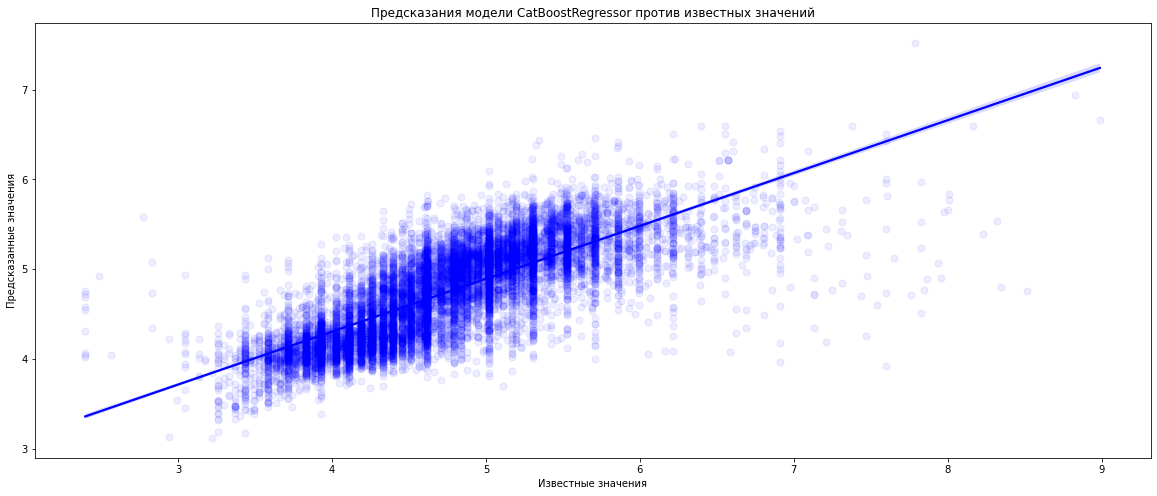

In [80]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, predictions_test_cb, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели CatBoostRegressor против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

In [81]:
# Проанализируем важность факторов
feature_importance_cb = pd.DataFrame({'feature_importance':model_cb.feature_importances_,\
                                   'feature_name': X_test.dtype.names}).sort_values(by=['feature_importance'],
                                    ascending=False)
#feature_importance_cb.to_csv(index=False)
feature_importance_cb

feature_importance feature_name
2  44.818288           None       
1  14.490795           None       
0  12.758705           None       
7  8.377604            None       
3  6.710202            None       
6  4.731957            None       
4  4.474599            None       
5  3.637850            None

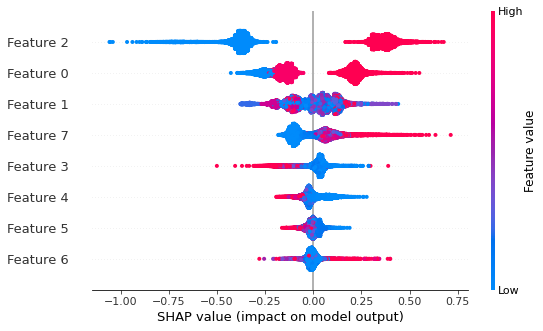

In [82]:
import shap
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

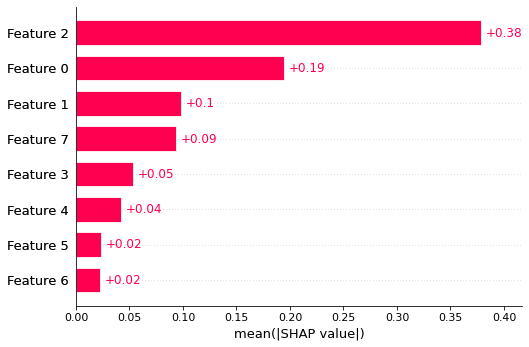

In [83]:
explainer = shap.Explainer(model_cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=X_test.shape[0])

#### Построение и тренировка модели Линейной регрессии

In [84]:
# Построим и обучим модель LR
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
y_train_pred_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print("Test MSE LinearRegression = %.4f" % mean_squared_error(y_test, y_pred_lr))
print("Train MSE LinearRegression = %.4f" % mean_squared_error(y_train, y_train_pred_lr))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Test RMSE модели LinearRegression на тестовой выборке: {:.2f}".format(rmse_lr_test))
print("Test R2 score LinearRegression: {:.2f}".format(r2_score(y_test,y_pred_lr)))
result.loc['LinearRegression','MSE'] = mean_squared_error(y_test, y_pred_lr).round(2)
result.loc['LinearRegression','RMSE'] = rmse_lr_test.round(2)
result.loc['LinearRegression','R2'] = r2_score(y_test,y_pred_lr).round(2)

Test MSE LinearRegression = 0.3574
Train MSE LinearRegression = 0.3617
Test RMSE модели LinearRegression на тестовой выборке: 0.60
Test R2 score LinearRegression: 0.24


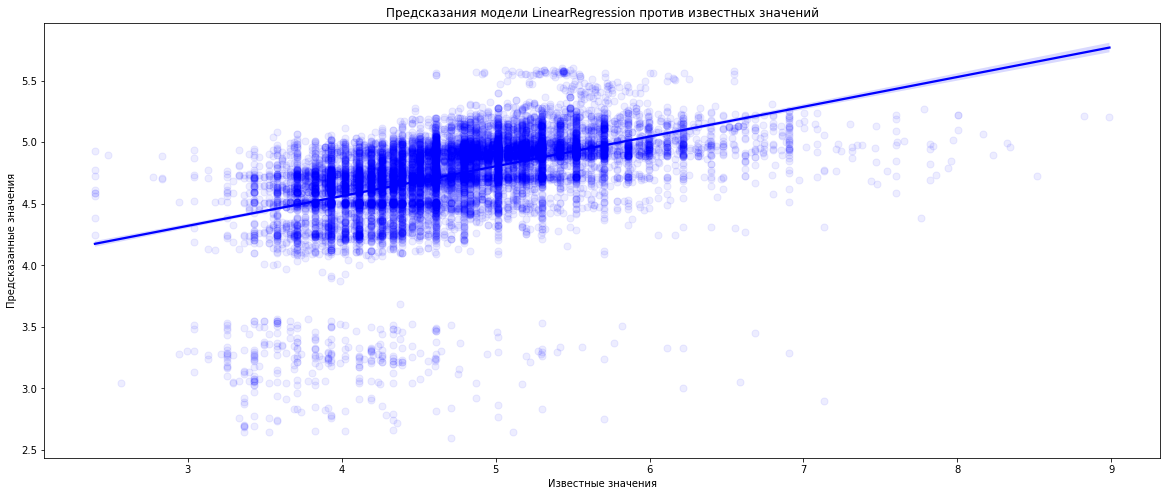

In [86]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, y_pred_lr, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели LinearRegression против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

#### Построение и тренировка модели RidgeRegression

In [87]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE RidgeRegression = %.2f" % mean_squared_error(y_test, y_pred))
print("Train MSE RidgeRegression = %.2f" % mean_squared_error(y_train, y_train_pred))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE модели RidgeRegression на тестовой выборке: {:.2f}".format(rmse_ridge_test))
print("Test R2 score RidgeRegression: {:.2f}".format(r2_score(y_test,y_pred)))
result.loc['RidgeRegression','MSE'] = mean_squared_error(y_test, y_pred).round(2)
result.loc['RidgeRegression','RMSE'] = rmse_ridge_test.round(2)
result.loc['RidgeRegression','R2'] = r2_score(y_test,y_pred).round(2)

Test MSE RidgeRegression = 0.36
Train MSE RidgeRegression = 0.36
Test RMSE модели RidgeRegression на тестовой выборке: 0.60
Test R2 score RidgeRegression: 0.24


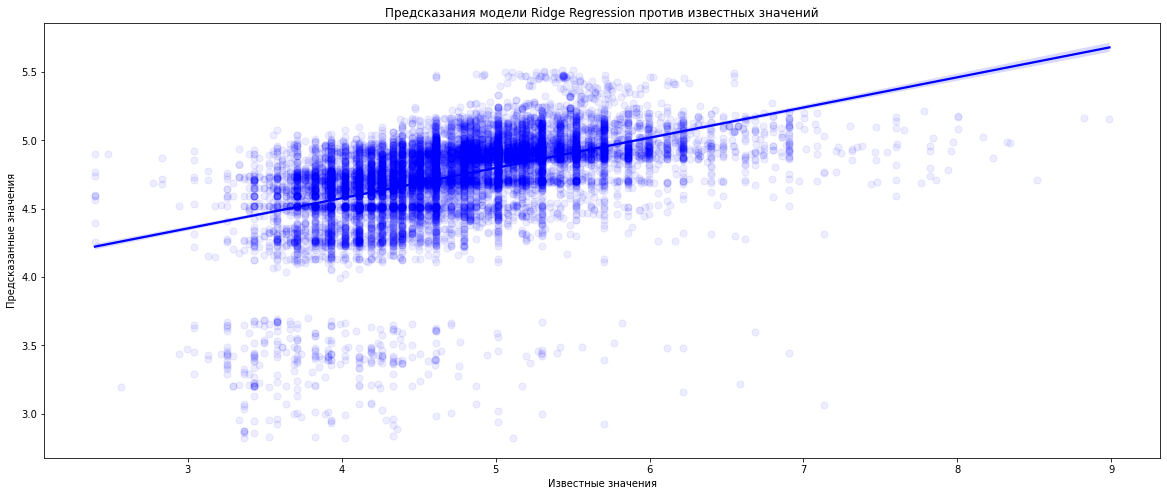

In [88]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, y_pred, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели Ridge Regression против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

#### Построение и тренировка модели LassoRegression

In [89]:
from sklearn.linear_model import Lasso

model1 = Lasso(alpha = 10)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_train_pred1 = model1.predict(X_train)

print("Test MSE LassoRegression = %.2f" % mean_squared_error(y_test, y_pred1))
print("Train MSE LassoRegression = %.2f" % mean_squared_error(y_train, y_train_pred1))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Test RMSE модели LassoRegression: {:.2f}".format(rmse_lasso_test))
print("Test R2 score LassoRegression: {:.2f}".format(r2_score(y_test,y_pred1)))
result.loc['LassoRegression','MSE'] = mean_squared_error(y_test, y_pred1).round(2)
result.loc['LassoRegression','RMSE'] = rmse_lasso_test.round(2)
result.loc['LassoRegression','R2'] = r2_score(y_test,y_pred1).round(2)

Test MSE LassoRegression = 0.47
Train MSE LassoRegression = 0.48
Test RMSE модели LassoRegression: 0.69
Test R2 score LassoRegression: -0.00


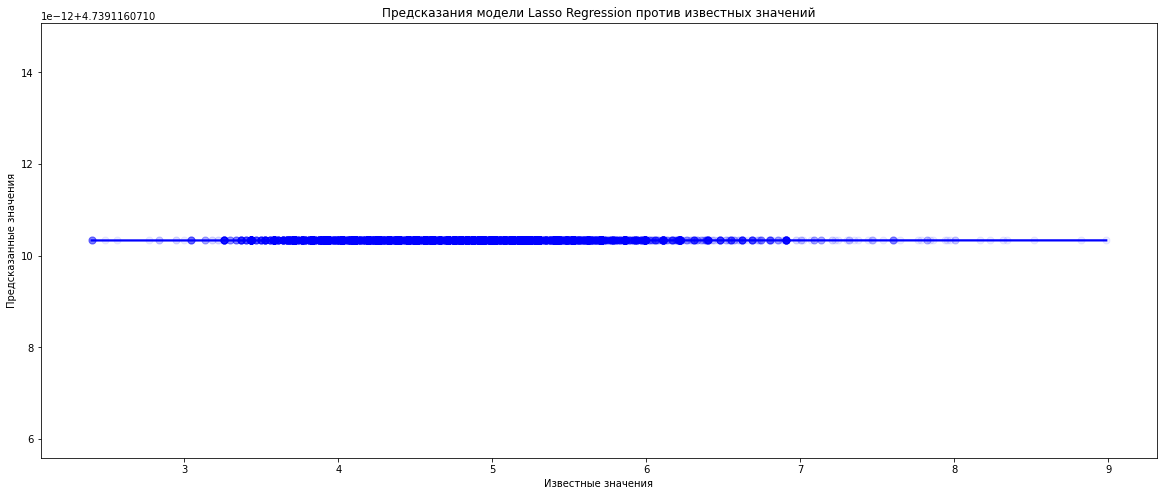

In [90]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, y_pred1, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели Lasso Regression против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

#### Построение и тренировка модели ElasticNetRegression

In [91]:
from sklearn.linear_model import ElasticNet
model2 = ElasticNet(alpha = 0.5,  l1_ratio= 0.5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_train_pred2 = model2.predict(X_train)

print("Test MSE ElasticNet Regression = %.2f" % mean_squared_error(y_test, y_pred2))
print("Train MSE ElasticNet Regression = %.2f" % mean_squared_error(y_train, y_train_pred2))
rmse_elastic_test = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Test RMSE модели ElasticNet Regression: {:.2f}".format(rmse_elastic_test))
print("Test R2 score ElasticNet Regression: {:.2f}".format(r2_score(y_test,y_pred2)))
result.loc['ElasticNet Regression','MSE'] = mean_squared_error(y_test, y_pred2).round(2)
result.loc['ElasticNet Regression','RMSE'] = rmse_elastic_test.round(2)
result.loc['ElasticNet Regression','R2'] = r2_score(y_test,y_pred2).round(2)

Test MSE ElasticNet Regression = 0.47
Train MSE ElasticNet Regression = 0.48
Test RMSE модели ElasticNet Regression: 0.69
Test R2 score ElasticNet Regression: -0.00


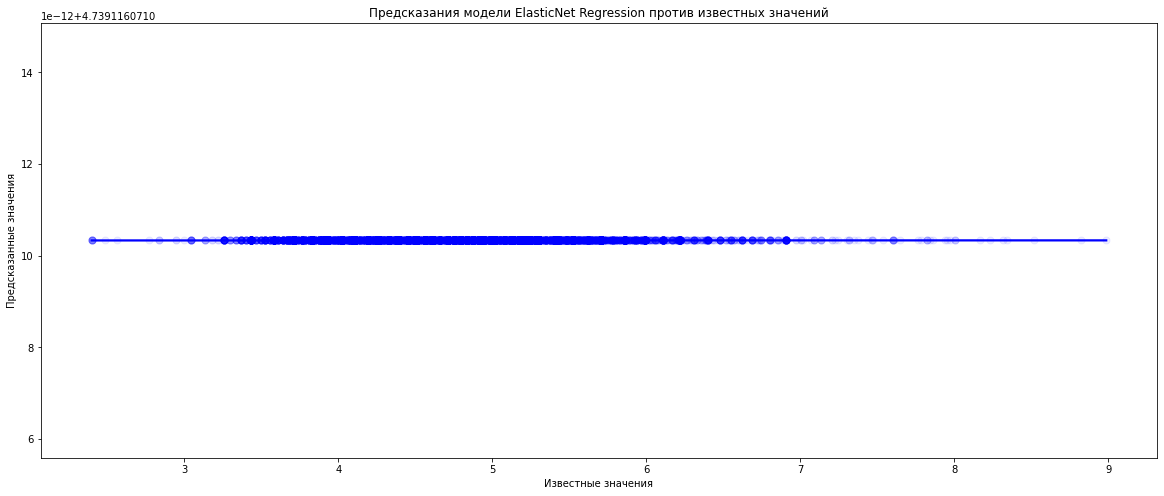

In [92]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, y_pred2, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели ElasticNet Regression против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

#### Построение и тренировка модели LGBMRegressor

In [93]:
#!pip install lightgbm
import lightgbm as lgb

In [94]:
# Сделаем подбрп параметров для модели. Я деактивировала эту ячейку, но она рабочая.

#model_lgb = lgb.LGBMRegressor(objective = 'root_mean_squared_error', random_state=42)
#parameters = {'depth'         : [4,6,8],
#              'learning_rate' : [0.01, 0.05, 0.1],
#              'n_estimators'    : [30, 50, 100]
#             }
#grid = GridSearchCV(estimator=model_lgb, param_grid = parameters, cv = 3, n_jobs=-1, verbose =100)
#grid.fit(X_train, y_train)
#print(" Results from Grid Search " )
##print(score)
#print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", grid.best_params_)

#Results from Grid Search

#The best estimator across ALL searched params:
# LGBMRegressor(depth=4, objective='root_mean_squared_error', random_state=42)

# The best score across ALL searched params:
# 0.589592085830288

# The best parameters across ALL searched params:
# {'depth': 4, 'learning_rate': 0.1, 'n_estimators': 100}

In [95]:
model_lgb = lgb.LGBMRegressor(objective = 'root_mean_squared_error', depth= 4,\
                              learning_rate=0.1, n_estimators=100, n_jobs=-1, random_state=42)
model_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: depth


LGBMRegressor(depth=4, objective='root_mean_squared_error', random_state=42)

In [96]:
y_train_pred_lgb = model_lgb.predict(X_train)
predictions_test_lgb = model_lgb.predict(X_test)
rmse_lgb_test = np.sqrt(mean_squared_error(y_test, predictions_test_lgb))
print("Train MSE модели LGBMRegressor= %.2f" % mean_squared_error(y_train, y_train_pred_lgb))
print("Test MSE модели LGBMRegressor = %.2f" % mean_squared_error(y_test, predictions_test_lgb))
print("Test RMSE модели LGBMRegressor: {:.2f}".format(rmse_lgb_test))
print("Test R2 score модели LGBMRegressor: {:.2f}".format(r2_score(y_test,predictions_test_lgb)))
result.loc['LGBMRegressor','MSE'] = mean_squared_error(y_test, predictions_test_lgb).round(2)
result.loc['LGBMRegressor','RMSE'] = rmse_lgb_test.round(2)
result.loc['LGBMRegressor','R2'] = r2_score(y_test,predictions_test_lgb).round(2)

Train MSE модели LGBMRegressor= 0.18
Test MSE модели LGBMRegressor = 0.19
Test RMSE модели LGBMRegressor: 0.44
Test R2 score модели LGBMRegressor: 0.59


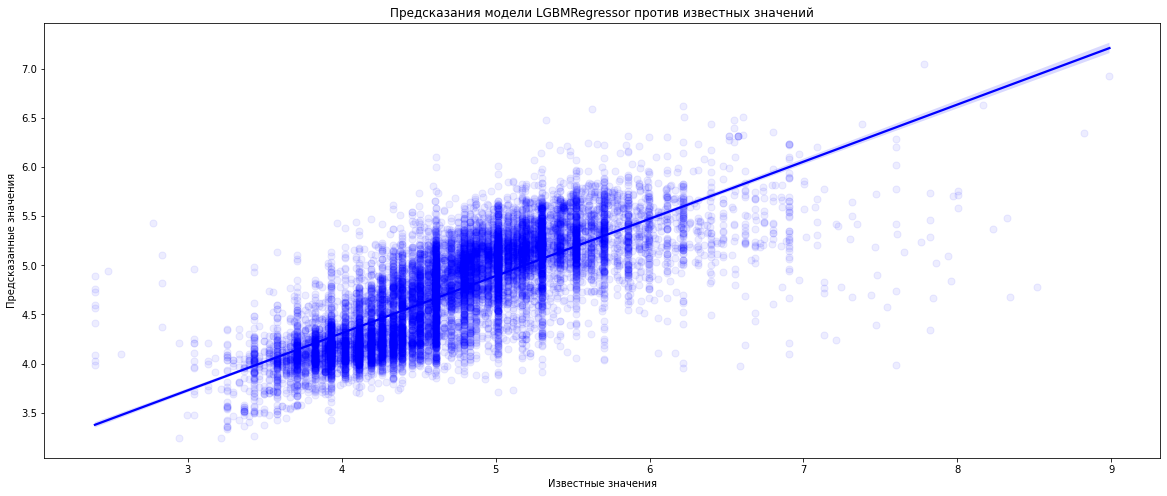

In [97]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, predictions_test_lgb, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели LGBMRegressor против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

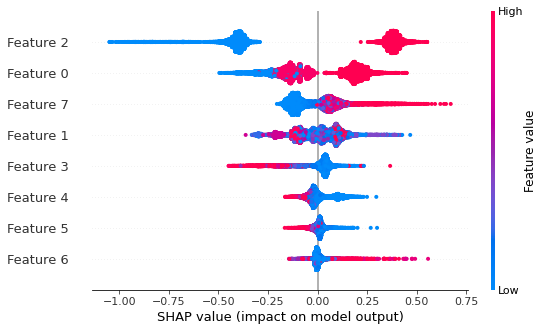

In [98]:
explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

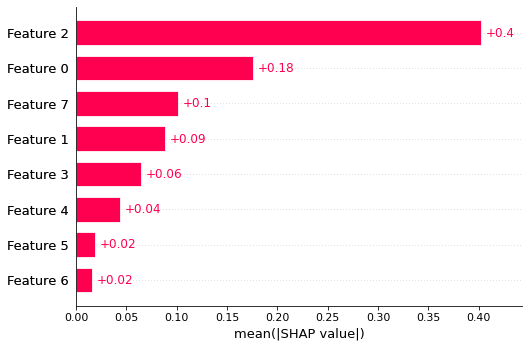

In [99]:
explainer = shap.Explainer(model_lgb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [100]:
result.sort_values(by='R2', ascending=False)

MSE  RMSE    R2
CatBoostRegressor      0.19  0.44  0.6 
LGBMRegressor          0.19  0.44  0.59
LinearRegression       0.36  0.6   0.24
RidgeRegression        0.36  0.6   0.24
DummyRegressor         0.47  0.69 -0.0 
LassoRegression        0.47  0.69 -0.0 
ElasticNet Regression  0.47  0.69 -0.0

- Модель CatBoostRegression справляется с заданием чуть лучше, чем другие модели, но близки к результату LGBMRegressor
- Обычные регрессионные модели не справляются, дают высокие ошибки
- С такими результатми предсказаний я бы не пошла к бизнесу


<a id="model2"></a>
## 2. Построение и тренировка моделей - Новая стратегия (Фаза2):

- Вернемся к изначальным данным и попробуем сделать пару преобразований:
    - трансформируем информацию о координатах в расстояние от объекта до центра Манхеттена
    - уберем самые выдающиеся аномалии в целевом признаке
    - оставим логарифрмирование целевоого признака

In [101]:
df = df_init

In [102]:
df = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1)
df.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2787     Brooklyn            Kensington    40.64749 -73.97237    
1  2845     Manhattan           Midtown       40.75362 -73.98377    
2  4632     Manhattan           Harlem        40.80902 -73.94190    
3  4869     Brooklyn            Clinton Hill  40.68514 -73.95976    
4  7192     Manhattan           East Harlem   40.79851 -73.94399    

         room_type  price  minimum_nights  number_of_reviews  \
0  Private room     149    1               9                   
1  Entire home/apt  225    1               45                  
2  Private room     150    3               0                   
3  Entire home/apt  89     1               270                 
4  Entire home/apt  80     10              9                   

   reviews_per_month  calculated_host_listings_count  availability_365  
0  0.21               6                               365               
1  0.38               2                               355               
2 NaN                 1                               365               
3  4.64               1                               194               
4  0.10               1                               0

In [103]:
df['lat_long'] = list(zip(df['latitude'],df['longitude']))
df=df.drop(['longitude', 'latitude'], axis=1)

In [104]:
!pip install geopy
import geopy
from geopy.distance import geodesic
from geopy import distance


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
df['center_coord'] = 0
df.insert(loc=1, column='lat_c', value=40.7529)
df.insert(loc=1, column='long_c', value=-73.9941)
df['center_coord'] = list(zip(df['lat_c'],df['long_c']))
df=df.drop(['long_c', 'lat_c'], axis=1)
df.head()

host_id neighbourhood_group neighbourhood        room_type  price  \
0  2787     Brooklyn            Kensington    Private room     149     
1  2845     Manhattan           Midtown       Entire home/apt  225     
2  4632     Manhattan           Harlem        Private room     150     
3  4869     Brooklyn            Clinton Hill  Entire home/apt  89      
4  7192     Manhattan           East Harlem   Entire home/apt  80      

   minimum_nights  number_of_reviews  reviews_per_month  \
0  1               9                  0.21                
1  1               45                 0.38                
2  3               0                 NaN                  
3  1               270                4.64                
4  10              9                  0.10                

   calculated_host_listings_count  availability_365               lat_long  \
0  6                               365               (40.64749, -73.97237)   
1  2                               355               (40.75362, -73.98377)   
2  1                               365               (40.80902, -73.9419)    
3  1                               194               (40.68514, -73.95976)   
4  1                               0                 (40.79851, -73.94399)   

          center_coord  
0  (40.7529, -73.9941)  
1  (40.7529, -73.9941)  
2  (40.7529, -73.9941)  
3  (40.7529, -73.9941)  
4  (40.7529, -73.9941)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  lat_long                        48895 non-null  object 
 11  center_coord                    48895 non-null  object 
dtypes: float64(1), int64(6), object(

In [107]:
df['distance']  = 0
df.head()

host_id neighbourhood_group neighbourhood        room_type  price  \
0  2787     Brooklyn            Kensington    Private room     149     
1  2845     Manhattan           Midtown       Entire home/apt  225     
2  4632     Manhattan           Harlem        Private room     150     
3  4869     Brooklyn            Clinton Hill  Entire home/apt  89      
4  7192     Manhattan           East Harlem   Entire home/apt  80      

   minimum_nights  number_of_reviews  reviews_per_month  \
0  1               9                  0.21                
1  1               45                 0.38                
2  3               0                 NaN                  
3  1               270                4.64                
4  10              9                  0.10                

   calculated_host_listings_count  availability_365               lat_long  \
0  6                               365               (40.64749, -73.97237)   
1  2                               355               (40.75362, -73.98377)   
2  1                               365               (40.80902, -73.9419)    
3  1                               194               (40.68514, -73.95976)   
4  1                               0                 (40.79851, -73.94399)   

          center_coord  distance  
0  (40.7529, -73.9941)  0         
1  (40.7529, -73.9941)  0         
2  (40.7529, -73.9941)  0         
3  (40.7529, -73.9941)  0         
4  (40.7529, -73.9941)  0

In [108]:
def distancer(df):
    return geopy.distance.geodesic(df.lat_long, df.center_coord).km
df['distance'] = df.apply(distancer, axis=1)

In [109]:
df = df.drop(['lat_long', 'center_coord', 'host_id'], axis=1)

In [110]:
# уберем объекты с нулевой ценой (ошибочные данные)
#df = df[df.price != 0]
# reviews_per_month проставим пропущенные значения (21%) медианным значением
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [111]:
# уберем самые экстремальные выбросы
q_low = df['price'].quantile(0.01)
q_high  = df['price'].quantile(0.99)
df = df[(df['price'] < q_high) & (df['price'] > q_low)]

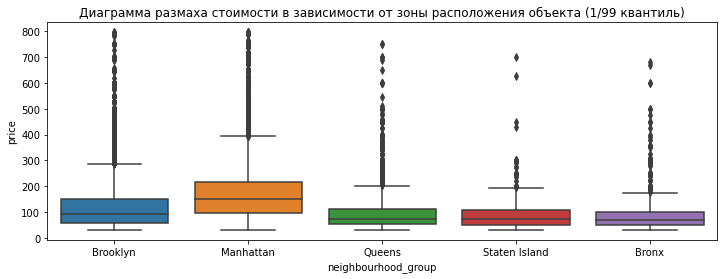

In [112]:
plt.figure(figsize = (12,4))
ax = sns.boxplot(x='neighbourhood_group', y="price", data=df)
plt.title('Диаграмма размаха стоимости в зависимости от зоны расположения объекта (1/99 квантиль)')
#ax.set_ylim([0, 1000])
plt.show()

Text(0.5, 1.0, 'Log of Price Density Distribution')

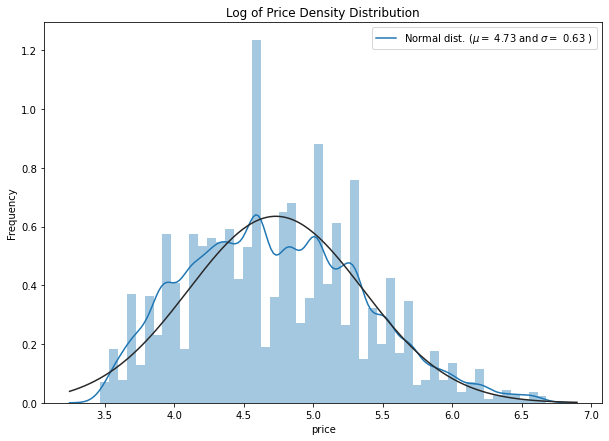

In [113]:
# также прологарифмируем целевой признак
df['price'] = np.log1p(df.price)
plt.figure(figsize=(10,7))
sns.distplot(df.price, fit=norm)

# фитим распределение на логарифм от цены
(mu, sigma) = norm.fit(df.price)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log of Price Density Distribution')

In [114]:
# Зададим функцию, которая кодирует категориальные признаки выбранным методом.
def encode_func(df, enc, cols = ['neighbourhood_group','neighbourhood','room_type']):
  df_enc = df.copy()
  df_enc[cols]= enc.fit_transform(df_enc[cols])
  return df_enc

In [115]:
from category_encoders import CountEncoder
enc = CountEncoder()
df_enc = encode_func(df, enc)
df_enc.head()

neighbourhood_group  neighbourhood  room_type     price  minimum_nights  \
0  19658                172            21856      5.010635  1                
1  21220                1492           24986      5.420535  1                
2  21220                2624           21856      5.017280  3                
3  19658                565            24986      4.499810  1                
4  21220                1107           24986      4.394449  10               

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0  9                  0.21               6                                
1  45                 0.38               2                                
2  0                  0.72               1                                
3  270                4.64               1                                
4  9                  0.10               1                                

   availability_365   distance  
0  365               11.848774  
1  355               0.876006   
2  365               7.632510   
3  194               8.064652   
4  0                 6.599178

In [116]:
X = df_enc.drop('price', axis=1)
y = df_enc['price']

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True)

In [118]:
# Проведем стандартизацию
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.5349138 , -0.47858651,  0.55067519, ..., -0.18815073,
        -0.74847397, -0.73769283],
       [ 0.25888293,  1.71822543, -0.36514177, ..., -0.15862837,
        -0.44428388,  0.30830472],
       [ 0.25888293,  1.71822543,  0.55067519, ..., -0.18815073,
         0.14888681,  0.4488619 ],
       ...,
       [ 0.25888293,  0.72679395,  0.55067519, ..., -0.15862837,
        -0.81691674,  0.04268489],
       [ 0.5349138 ,  0.91167816, -0.36514177, ..., -0.12910601,
         1.43408995,  0.36018204],
       [-2.2444803 , -0.87903441, -0.36514177, ..., -0.12910601,
        -0.8549405 ,  0.36303751]])

In [119]:
# Создадим новый маленький датафрейм с итоговыми результатами
columns = ['MSE', 'RMSE', 'R2']
models = ['DummyRegressor', 'CatBoostRegressor', 'LGBMRegressor','RidgeRegression']
result2 = pd.DataFrame(columns=columns, index = models)
result2

MSE RMSE   R2
DummyRegressor     NaN  NaN  NaN
CatBoostRegressor  NaN  NaN  NaN
LGBMRegressor      NaN  NaN  NaN
RidgeRegression    NaN  NaN  NaN

#### Построение и тренировка модели DummyRegressor

In [120]:
# В самом начале посмотрим на прогноз модели построенной с помощью DummyRegressor
from sklearn.dummy import DummyRegressor

model_dr = DummyRegressor()
#strategy='median'
model_dr.fit(X_train, y_train)
y_train_pred_dr = model_dr.predict(X_train)
predictions_test_dr = model_dr.predict(X_test)
rmse_dr_test = np.sqrt(mean_squared_error(y_test, predictions_test_dr))
print("Test MSE DummyRegressor = %.2f" % mean_squared_error(y_test, predictions_test_dr))
print("Train MSE DummyRegressor = %.2f" % mean_squared_error(y_train, y_train_pred_dr))
print('Test RMSE модели DummyRegressor: {:.2f}'.format(rmse_dr_test))
print('Test R2 модели DummyRegressor: {:.2f}'.format(r2_score(y_test, predictions_test_dr)))
result2.loc['DummyRegressor','MSE'] = mean_squared_error(y_test, predictions_test_dr).round(2)
result2.loc['DummyRegressor','RMSE'] = rmse_dr_test.round(2)
result2.loc['DummyRegressor','R2'] = r2_score(y_test,predictions_test_dr).round(2)

Test MSE DummyRegressor = 0.39
Train MSE DummyRegressor = 0.40
Test RMSE модели DummyRegressor: 0.63
Test R2 модели DummyRegressor: -0.00


#### Построение и тренировка модели CatBoostRegressor

In [121]:
#model_cb = CatBoostRegressor(#one_hot_max_size=5,
#                             random_seed=42, verbose =100, loss_function= "RMSE"
#                             )
#parameters = {'depth'         : [6, 8,10],
#              'learning_rate' : [0.01, 0.05, 0.1],
#              'iterations'    : [50,100,120]
#             }
#grid = GridSearchCV(estimator=model_cb, param_grid = parameters, cv = 5,\
#                     n_jobs=-1, verbose=True)
#grid.fit(X_train, y_train)
#print(" Results from Grid Search " )
#print(score)
#print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", grid.best_params_)

#The best estimator across ALL searched params:
# <catboost.core.CatBoostRegressor object at 0x0000026B4F5E8730>

# The best score across ALL searched params:
# 0.6338068928267043

# The best parameters across ALL searched params:
# {'depth': 10, 'iterations': 120, 'learning_rate': 0.1}

In [122]:
# Построим модель на основе алгоритма CatBoost
model_cb = CatBoostRegressor(verbose=50, random_seed=42, iterations= 120,\
                             learning_rate = 0.1, depth=10, loss_function='RMSE')
model_cb.fit(X_train,y_train, eval_set=(X_test,y_test),\
              use_best_model=True, plot=True)
print(model_cb.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5949057	test: 0.5918525	best: 0.5918525 (0)	total: 78.6ms	remaining: 9.35s
50:	learn: 0.3729003	test: 0.3815687	best: 0.3815687 (50)	total: 5.12s	remaining: 6.93s
100:	learn: 0.3615546	test: 0.3773215	best: 0.3773215 (100)	total: 11.1s	remaining: 2.08s
119:	learn: 0.3576134	test: 0.3762421	best: 0.3762421 (119)	total: 13.3s	remaining: 0us

bestTest = 0.3762421044
bestIteration = 119

{'learn': {'RMSE': 0.35761344108769555}, 'validation': {'RMSE': 0.37624210440013917}}


In [123]:
y_train_pred_cb = model_cb.predict(X_train)
predictions_test_cb = model_cb.predict(X_test)
rmse_cb_test = np.sqrt(mean_squared_error(y_test, predictions_test_cb))
print("Test MSE CatBoostRegressor = %.2f" % mean_squared_error(y_test, predictions_test_cb))
print("Train MSE CatBoostRegressor = %.2f" % mean_squared_error(y_train, y_train_pred_cb))
print("Test RMSE модели CatBoostRegressor: {:.2f}".format(rmse_cb_test))
print("Test R2 score: {:.2f}".format(r2_score(y_test,predictions_test_cb)))
result2.loc['CatBoostRegressor','MSE'] = mean_squared_error(y_test, predictions_test_cb).round(2)
result2.loc['CatBoostRegressor','RMSE'] = rmse_cb_test.round(2)
result2.loc['CatBoostRegressor','R2'] = r2_score(y_test,predictions_test_cb).round(2)

Test MSE CatBoostRegressor = 0.14
Train MSE CatBoostRegressor = 0.13
Test RMSE модели CatBoostRegressor: 0.38
Test R2 score: 0.64


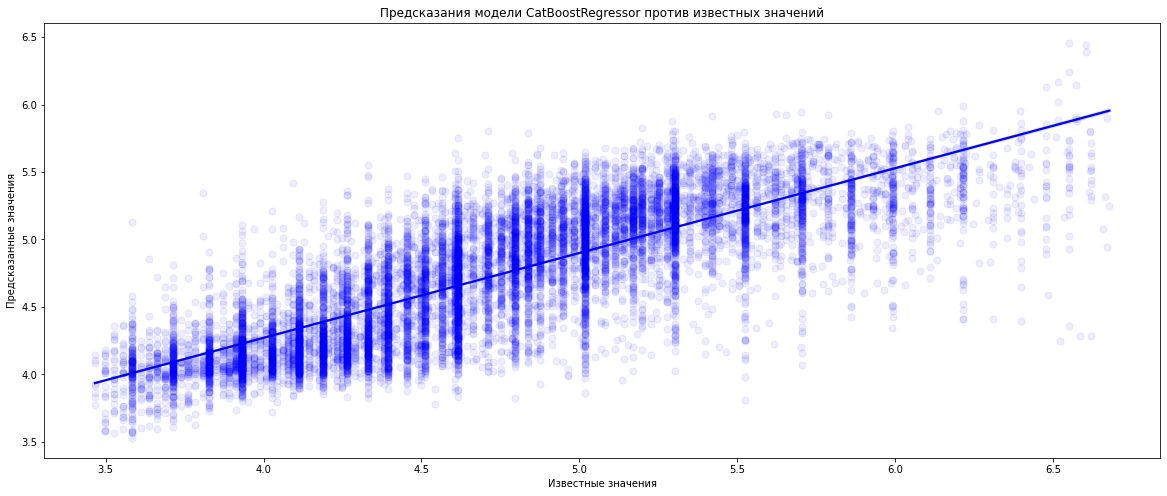

In [124]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, predictions_test_cb, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели CatBoostRegressor против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

In [125]:
# Проанализируем важность факторов
feature_importance_cb = pd.DataFrame({'feature_importance':model_cb.feature_importances_,\
                                   'feature_name': X_test.dtype.names}).sort_values(by=['feature_importance'],
                                    ascending=False)
#feature_importance_cb.to_csv(index=False)
feature_importance_cb

feature_importance feature_name
2  52.270315           None       
8  13.082172           None       
7  7.962340            None       
3  6.104366            None       
1  4.894057            None       
0  4.171533            None       
4  3.973545            None       
6  3.915077            None       
5  3.626595            None

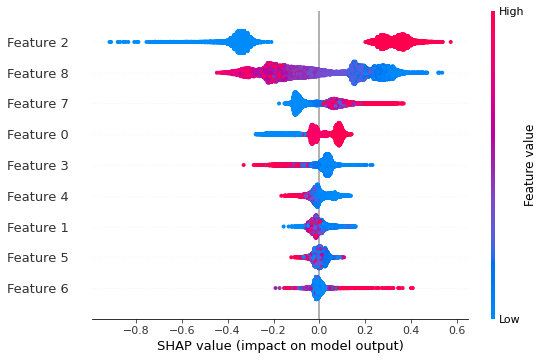

In [126]:
import shap
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

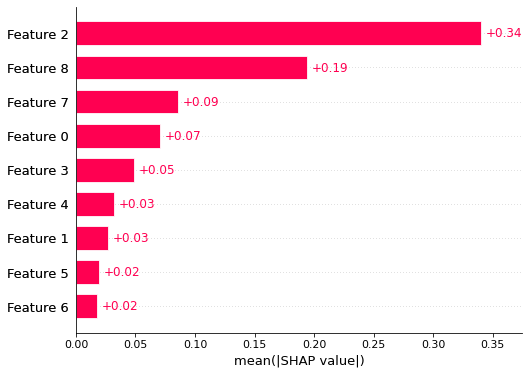

In [127]:
explainer = shap.Explainer(model_cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=X_test.shape[0])

#### Построение и тренировка модели LGBMRegressor

In [128]:
#import lightgbm as lgb
#model_lgb = lgb.LGBMRegressor(objective = 'root_mean_squared_error', random_state=42)
#parameters = {'depth'         : [4,6,8],
#              'learning_rate' : [0.01, 0.05, 0.1],
#              'n_estimators'    : [30, 50, 100]
#             }
#grid = GridSearchCV(estimator=model_lgb, param_grid = parameters, cv = 3, n_jobs=-1, verbose =100)
#grid.fit(X_train, y_train)
#print(" Results from Grid Search " )
##print(score)
#print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", grid.best_params_)

#Results from Grid Search

#The best estimator across ALL searched params:
# LGBMRegressor(depth=4, objective='root_mean_squared_error', random_state=42)

# The best score across ALL searched params:
# 0.6303700270945757

# The best parameters across ALL searched params:
# {'depth': 4, 'learning_rate': 0.1, 'n_estimators': 100}

In [129]:
model_lgb = lgb.LGBMRegressor(objective = 'root_mean_squared_error', depth= 4,\
                              learning_rate=0.1, n_estimators=100, n_jobs=-1, random_state=42)
model_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: depth


LGBMRegressor(depth=4, objective='root_mean_squared_error', random_state=42)

In [130]:
y_train_pred_lgb = model_lgb.predict(X_train)
predictions_test_lgb = model_lgb.predict(X_test)
rmse_lgb_test = np.sqrt(mean_squared_error(y_test, predictions_test_lgb))
print("Train MSE модели LGBMRegressor= %.2f" % mean_squared_error(y_train, y_train_pred_lgb))
print("Test MSE модели LGBMRegressor = %.2f" % mean_squared_error(y_test, predictions_test_lgb))
print("Test RMSE модели LGBMRegressor: {:.2f}".format(rmse_lgb_test))
print("Test R2 score модели LGBMRegressor: {:.2f}".format(r2_score(y_test,predictions_test_lgb)))
result2.loc['LGBMRegressor','MSE'] = mean_squared_error(y_test, predictions_test_lgb).round(2)
result2.loc['LGBMRegressor','RMSE'] = rmse_lgb_test.round(2)
result2.loc['LGBMRegressor','R2'] = r2_score(y_test,predictions_test_lgb).round(2)

Train MSE модели LGBMRegressor= 0.13
Test MSE модели LGBMRegressor = 0.14
Test RMSE модели LGBMRegressor: 0.38
Test R2 score модели LGBMRegressor: 0.64


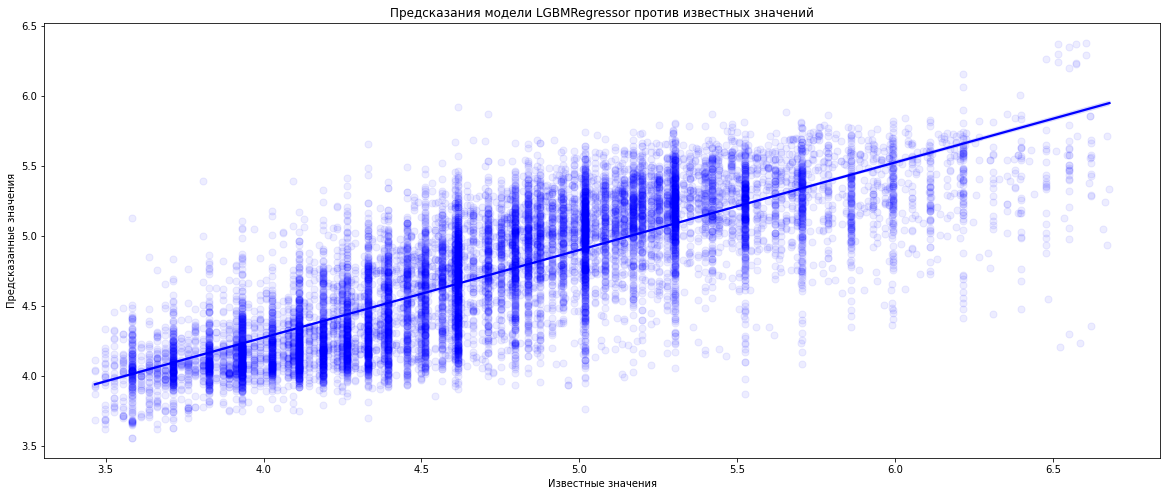

In [131]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, predictions_test_lgb, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели LGBMRegressor против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

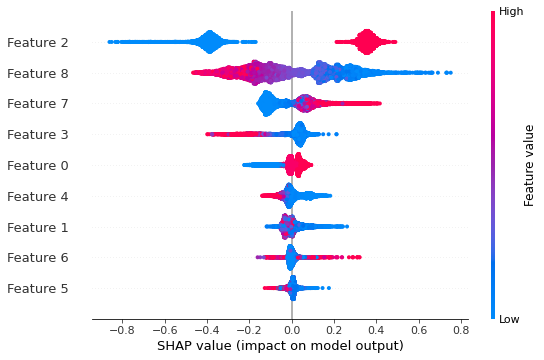

In [132]:
explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

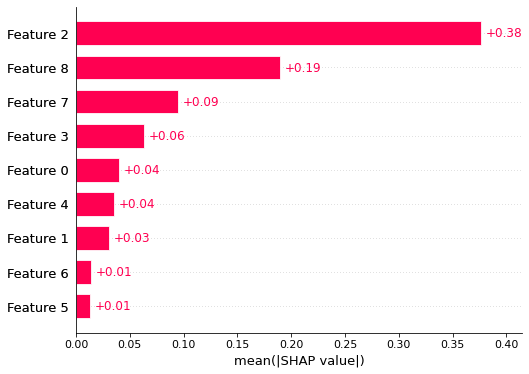

In [133]:
explainer = shap.Explainer(model_lgb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=X_test.shape[0])

#### Построение и тренировка модели RidgeRegression

In [134]:
model = Ridge(alpha = 100, solver= 'svd')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE RidgeRegression = %.2f" % mean_squared_error(y_test, y_pred))
print("Train MSE RidgeRegression = %.2f" % mean_squared_error(y_train, y_train_pred))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE модели RidgeRegression на тестовой выборке: {:.2f}".format(rmse_ridge_test))
print("Test R2 score RidgeRegression: {:.2f}".format(r2_score(y_test,y_pred)))
result2.loc['RidgeRegression','MSE'] = mean_squared_error(y_test, y_pred).round(2)
result2.loc['RidgeRegression','RMSE'] = rmse_ridge_test.round(2)
result2.loc['RidgeRegression','R2'] = r2_score(y_test,y_pred).round(2)

Test MSE RidgeRegression = 0.26
Train MSE RidgeRegression = 0.26
Test RMSE модели RidgeRegression на тестовой выборке: 0.51
Test R2 score RidgeRegression: 0.33


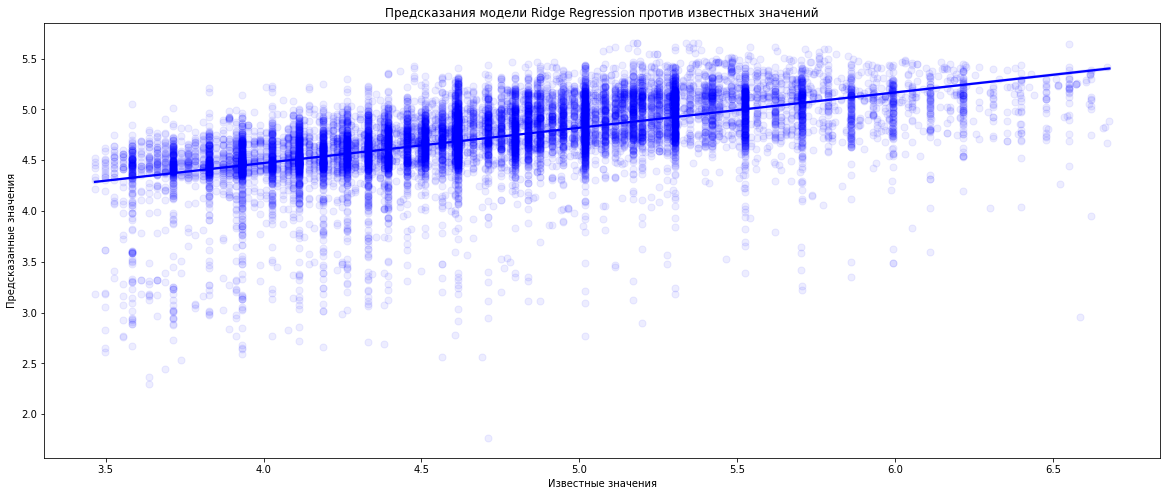

In [135]:
# Визуализируем качество предсказания модели
plt.figure(figsize=(20,8))
sns.regplot(y_test, y_pred, color= 'b', fit_reg=True, scatter_kws={"s": 50, 'alpha':0.07})
plt.title('Предсказания модели Ridge Regression против известных значений')
plt.xlabel('Известные значения')
plt.ylabel('Предсказанные значения')
plt.show()

In [136]:
result2.sort_values(by='R2', ascending=False)

MSE  RMSE    R2
CatBoostRegressor  0.14  0.38  0.64
LGBMRegressor      0.14  0.38  0.64
RidgeRegression    0.26  0.51  0.33
DummyRegressor     0.39  0.63 -0.0

#### Построение и тренировка модели RidgeRegression - с подбором альфа

In [137]:
from sklearn.pipeline import Pipeline
alphas=np.linspace(1,stop=120)
pipe=Pipeline([('scaler',RobustScaler()), ('ridgemodel',RidgeCV(alphas=alphas,
                                                                cv=None,store_cv_values=True ))])
model=pipe.fit(X_train,y_train)
print('Alpha: %f'%model['ridgemodel'].alpha_)
print('Score: %f'%np.sqrt(-model['ridgemodel'].best_score_))

Alpha: 27.714286
Score: 0.508804


In [138]:
model = Ridge(alpha = 27.71, solver= 'svd')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE RidgeRegression = %.2f" % mean_squared_error(y_test, y_pred))
print("Train MSE RidgeRegression = %.2f" % mean_squared_error(y_train, y_train_pred))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE модели RidgeRegression на тестовой выборке: {:.2f}".format(rmse_ridge_test))
print("Test R2 score RidgeRegression: {:.2f}".format(r2_score(y_test,y_pred)))
result2.loc['RidgeRegression','MSE'] = mean_squared_error(y_test, y_pred).round(2)
result2.loc['RidgeRegression','RMSE'] = rmse_ridge_test.round(2)
result2.loc['RidgeRegression','R2'] = r2_score(y_test,y_pred).round(2)

Test MSE RidgeRegression = 0.26
Train MSE RidgeRegression = 0.26
Test RMSE модели RidgeRegression на тестовой выборке: 0.51
Test R2 score RidgeRegression: 0.33


<a id="result"></a>
## 4. Итоговые сводные результаты - до и после преобразований:

In [139]:
# Фаза 1
result.sort_values(by='R2', ascending=False)

MSE  RMSE    R2
CatBoostRegressor      0.19  0.44  0.6 
LGBMRegressor          0.19  0.44  0.59
LinearRegression       0.36  0.6   0.24
RidgeRegression        0.36  0.6   0.24
DummyRegressor         0.47  0.69 -0.0 
LassoRegression        0.47  0.69 -0.0 
ElasticNet Regression  0.47  0.69 -0.0

In [140]:
# Фаза 2
result2.sort_values(by='R2', ascending=False)

MSE  RMSE    R2
CatBoostRegressor  0.14  0.38  0.64
LGBMRegressor      0.14  0.38  0.64
RidgeRegression    0.26  0.51  0.33
DummyRegressor     0.39  0.63 -0.0

1. Можно сказать, что практические никакие действия не помогли кардинально улучшить качество моделей. Пробовала:
    - убрать лишние признаки
    - добавить новый существенный признак
    - определить и убрать крайние аномалии
    - сгладить целевой признак через логарифмирование
    - использовать несколько разные кодировщиков для категориальных переменных
    - использовать глубокий подбор параметров с помощью GridSearch
    - нормализация данных через разные нормировщики
    - построить абсолютно разные (алгоритмически) модели
    - проводить кросс-валидацию при подборе параметров моделей
    
2. Фаза 2 (введение нового признака расстояние от центра) сильно повлияло на все модели - этот признак, согласно SHAP-анализу всех моделей, вышел на 2 место по влиянию на результат
3. Я подтверждаю свой вывод, который был сделан на основе анализа карты с плотностью объектов по цене:я бы делала два разных датасета и различный анализ в двух измерениях:
     - комнаты отдельно, квартиры отдельно (как минимум)
     - Манхеттен отдельно от всего остального (как максимум)
     - аномально дорогие (элитные) объекты также должны анализироваться как отдельный сегмент рынка
4. Все модели даже при проделанных манипуляциях дают невысокое качество предсказания (лучший R2score = 0,64)
5. Также я бы предложила получить больше данных для лучшего моделирования и определения цены - площадь, этаж, балкон, наличие техники или мебели (напр., посудомоечной/стиральной машины), величина залога, близость определенных объектов и т.д.